# 2. EDA & Data preprocessing, Visualization

## a. EDA & Data preprocessing

In [49]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

### 1) Load Data & EDA

In [1]:
# 패키지 인스톨
!pip install pdpbox
!pip install shap
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
#지수표현식 없애기 
pd.options.display.float_format = '{:.5f}'.format

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# colab 드라이브에서 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 한글 csv 파일 불러오기
data = pd.read_csv("/content/drive/MyDrive/AIB16_2022/Section2/project2/Building_Solar_Energy_2018.csv", sep=";", quoting=3, error_bad_lines=False, encoding='cp949') # quoting: 구분자로 나뉠때 한 칸에 여러 단어로 나눠지는 경우 해결 / 한글 csv 파일 : 'cp949'로 해결 
df = data.copy()
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,건물관리번호,건물명,층수,건물높이,건물면적,총에너지량,1월에너지량,2월에너지량,3월에너지량,4월에너지량,...,10월에너지량,11월에너지량,12월에너지량,1분기에너지량,2분기에너지량,3분기에너지량,4분기에너지량,음영도,x좌표,y좌표
0,0,샤인모텔,1,3.50000,32.30051,1194.30848,39.72644,60.48418,104.43196,128.63719,...,76.51350,63.32917,41.44619,204.64258,416.32233,392.05471,181.28886,11500,941681.38036,1947929.24848
1,0,NaN,2,7.00000,112.17324,630.52268,6.12029,25.79633,50.68446,71.05804,...,34.13593,16.59084,8.14479,82.60108,259.00958,230.04045,58.87156,11560,948389.27170,1945790.04799
2,0,태양컴퓨터교실,3,10.50000,89.66845,1194.30848,39.72644,60.48418,104.43196,128.63719,...,76.51350,63.32917,41.44619,204.64258,416.32233,392.05471,181.28886,11500,941682.43327,1947786.84111
3,0,NaN,1,3.50000,78.60784,1024.52350,5.22650,44.55480,82.82531,113.03455,...,58.11587,29.56296,15.03473,132.60662,417.71118,371.49214,102.71356,11560,947720.04647,1945839.09472
4,0,산호빌라,3,10.50000,125.74256,1194.30848,39.72644,60.48418,104.43196,128.63719,...,76.51350,63.32917,41.44619,204.64258,416.32233,392.05471,181.28886,11500,941678.61147,1947945.88217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029867,18071037627,NaN,0,0.00000,107.16004,553.30445,7.40405,13.94796,34.15048,60.14238,...,19.75720,8.32391,4.33195,55.50249,253.96601,211.42290,32.41305,11320,959009.38541,1962941.89761
1029868,18071037628,홈플러스방학점,0,0.00000,4845.50022,1138.31263,23.09171,42.01964,87.70315,127.96719,...,56.93373,25.98631,12.66709,152.81449,472.56118,417.34982,95.58714,11320,959756.08334,1962915.30387
1029869,18071037629,방학동도깨비시장,0,0.00000,812.86618,1059.66494,20.56781,38.71835,81.74351,119.28770,...,52.79693,23.45164,11.10615,141.02967,441.53119,389.74936,87.35472,11320,958981.22425,1962927.23618
1029870,18071037630,NaN,0,0.00000,95.07463,921.40483,23.84678,40.09238,75.51199,102.08007,...,52.35307,26.33770,13.47602,139.45114,362.96228,326.82462,92.16678,11305,956229.42275,1964052.81553


In [5]:
df.shape

(1029872, 25)

In [6]:
df.columns

Index(['건물관리번호', '건물명', '층수', '건물높이', '건물면적', '총에너지량', '1월에너지량', '2월에너지량',
       '3월에너지량', '4월에너지량', '5월에너지량', '6월에너지량', '7월에너지량', '8월에너지량', '9월에너지량',
       '10월에너지량', '11월에너지량', '12월에너지량', '1분기에너지량', '2분기에너지량', '3분기에너지량',
       '4분기에너지량', '음영도', 'x좌표', 'y좌표'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029872 entries, 0 to 1029871
Data columns (total 25 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   건물관리번호   1029872 non-null  int64  
 1   건물명      376195 non-null   object 
 2   층수       1029872 non-null  int64  
 3   건물높이     1029872 non-null  float64
 4   건물면적     1029872 non-null  float64
 5   총에너지량    1029872 non-null  float64
 6   1월에너지량   1029872 non-null  float64
 7   2월에너지량   1029872 non-null  float64
 8   3월에너지량   1029872 non-null  float64
 9   4월에너지량   1029872 non-null  float64
 10  5월에너지량   1029872 non-null  float64
 11  6월에너지량   1029872 non-null  float64
 12  7월에너지량   1029872 non-null  float64
 13  8월에너지량   1029872 non-null  float64
 14  9월에너지량   1029872 non-null  float64
 15  10월에너지량  1029872 non-null  float64
 16  11월에너지량  1029872 non-null  float64
 17  12월에너지량  1029872 non-null  float64
 18  1분기에너지량  1029872 non-null  float64
 19  2분기에너지량  1029872 non-null  float64
 20  3분

건물관리번호 : 유의미한 데이터인지 의문 - 중복치도 많고, 무슨 기준으로 나눠진 번호인지 알 수 없음
  - 중복치 확인 후, 제거하거나 다른 결측치 처리가 끝난 후, ID칼럼(obejct type)으로 변경

건물명 : 결측치가 너무 많고, 유의미한 데이터가 아니므로 칼럼 제거

층수, 건물높이 : 0인 데이터들이 결측치로 예상됨 - 면적과 에너지량은 모두 존재하지만 타겟 데이터가 0이므로 결측치를 모두 제거

에너지량 : 월/분기 모두 존재해야되는지 의문, 월별 데이터가 존재한다면 분기별 데이터가 없어도 될 것 같으나 어떤 상관관계가 나타날지 모르기 때문에 일단 제거 보류

x좌표, Y좌표 : 유의미한 데이터가 아닐 것으로 예상되나, 나중에 feature selection을 통해 확인 후, 제거하도록 함

### 2) Missing Value

#### 건물명

In [8]:
df.건물명.isnull().sum()  # '건물명' 칼럼의 결측치 확인 : 653677개의 결측치가 존재하고, 건물 높이를 예측하는데 있어 건물명은 유의미한 데이터가 아니므로 칼럼 삭제

653677

In [9]:
df = df.drop('건물명', axis=1) # '건물명' 열 삭제
df.columns

Index(['건물관리번호', '층수', '건물높이', '건물면적', '총에너지량', '1월에너지량', '2월에너지량', '3월에너지량',
       '4월에너지량', '5월에너지량', '6월에너지량', '7월에너지량', '8월에너지량', '9월에너지량', '10월에너지량',
       '11월에너지량', '12월에너지량', '1분기에너지량', '2분기에너지량', '3분기에너지량', '4분기에너지량', '음영도',
       'x좌표', 'y좌표'],
      dtype='object')

#### 층수, 건물높이

In [10]:
df.isnull().sum() # 결측치는 존재하지 않으나, 0으로 입력되어있는 값들이 있다.

건물관리번호     0
층수         0
건물높이       0
건물면적       0
총에너지량      0
1월에너지량     0
2월에너지량     0
3월에너지량     0
4월에너지량     0
5월에너지량     0
6월에너지량     0
7월에너지량     0
8월에너지량     0
9월에너지량     0
10월에너지량    0
11월에너지량    0
12월에너지량    0
1분기에너지량    0
2분기에너지량    0
3분기에너지량    0
4분기에너지량    0
음영도        0
x좌표        0
y좌표        0
dtype: int64

In [11]:
# '층수' 0값 확인(조건) : 355081개
df[df['층수'] == 0] 

,건물관리번호,층수,건물높이,건물면적,총에너지량,1월에너지량,2월에너지량,3월에너지량,4월에너지량,5월에너지량,...,10월에너지량,11월에너지량,12월에너지량,1분기에너지량,2분기에너지량,3분기에너지량,4분기에너지량,음영도,x좌표,y좌표
1405,0,0,0.00000,28.21751,1024.52350,5.22650,44.55480,82.82531,113.03455,147.94951,...,58.11587,29.56296,15.03473,132.60662,417.71118,371.49214,102.71356,11560,947451.16562,1945061.90106
3429,0,0,0.00000,28.21824,1024.52350,5.22650,44.55480,82.82531,113.03455,147.94951,...,58.11587,29.56296,15.03473,132.60662,417.71118,371.49214,102.71356,11560,947454.35981,1945067.39422
3845,0,0,0.00000,28.21751,1024.52350,5.22650,44.55480,82.82531,113.03455,147.94951,...,58.11587,29.56296,15.03473,132.60662,417.71118,371.49214,102.71356,11560,947452.67451,1945062.76522
3857,0,0,0.00000,28.21824,1024.52350,5.22650,44.55480,82.82531,113.03455,147.94951,...,58.11587,29.56296,15.03473,132.60662,417.71118,371.49214,102.71356,11560,947455.49401,1945064.94569
3869,0,0,0.00000,28.21751,1024.52350,5.22650,44.55480,82.82531,113.03455,147.94951,...,58.11587,29.56296,15.03473,132.60662,417.71118,371.49214,102.71356,11560,947448.33563,1945060.55767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029867,18071037627,0,0.00000,107.16004,553.30445,7.40405,13.94796,34.15048,60.14238,90.49032,...,19.75720,8.32391,4.33195,55.50249,253.96601,211.42290,32.41305,11320,959009.38541,1962941.89761
1029868,18071037628,0,0.00000,4845.50022,1138.31263,23.09171,42.01964,87.70315,127.96719,167.21999,...,56.93373,25.98631,12.66709,152.81449,472.56118,417.34982,95.58714,11320,959756.08334,1962915.30387
1029869,18071037629,0,0.00000,812.86618,1059.66494,20.56781,38.71835,81.74351,119.28770,156.20694,...,52.79693,23.45164,11.10615,141.02967,441.53119,389.74936,87.35472,11320,958981.22425,1962927.23618
1029870,18071037630,0,0.00000,95.07463,921.40483,23.84678,40.09238,75.51199,102.08007,127.42007,...,52.35307,26.33770,13.47602,139.45114,362.96228,326.82462,92.16678,11305,956229.42275,1964052.81553


In [12]:
# '건물높이' 0값 확인 : 355102개
df[df['건물높이'] == 0] 

,건물관리번호,층수,건물높이,건물면적,총에너지량,1월에너지량,2월에너지량,3월에너지량,4월에너지량,5월에너지량,...,10월에너지량,11월에너지량,12월에너지량,1분기에너지량,2분기에너지량,3분기에너지량,4분기에너지량,음영도,x좌표,y좌표
1405,0,0,0.00000,28.21751,1024.52350,5.22650,44.55480,82.82531,113.03455,147.94951,...,58.11587,29.56296,15.03473,132.60662,417.71118,371.49214,102.71356,11560,947451.16562,1945061.90106
3429,0,0,0.00000,28.21824,1024.52350,5.22650,44.55480,82.82531,113.03455,147.94951,...,58.11587,29.56296,15.03473,132.60662,417.71118,371.49214,102.71356,11560,947454.35981,1945067.39422
3845,0,0,0.00000,28.21751,1024.52350,5.22650,44.55480,82.82531,113.03455,147.94951,...,58.11587,29.56296,15.03473,132.60662,417.71118,371.49214,102.71356,11560,947452.67451,1945062.76522
3857,0,0,0.00000,28.21824,1024.52350,5.22650,44.55480,82.82531,113.03455,147.94951,...,58.11587,29.56296,15.03473,132.60662,417.71118,371.49214,102.71356,11560,947455.49401,1945064.94569
3869,0,0,0.00000,28.21751,1024.52350,5.22650,44.55480,82.82531,113.03455,147.94951,...,58.11587,29.56296,15.03473,132.60662,417.71118,371.49214,102.71356,11560,947448.33563,1945060.55767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029867,18071037627,0,0.00000,107.16004,553.30445,7.40405,13.94796,34.15048,60.14238,90.49032,...,19.75720,8.32391,4.33195,55.50249,253.96601,211.42290,32.41305,11320,959009.38541,1962941.89761
1029868,18071037628,0,0.00000,4845.50022,1138.31263,23.09171,42.01964,87.70315,127.96719,167.21999,...,56.93373,25.98631,12.66709,152.81449,472.56118,417.34982,95.58714,11320,959756.08334,1962915.30387
1029869,18071037629,0,0.00000,812.86618,1059.66494,20.56781,38.71835,81.74351,119.28770,156.20694,...,52.79693,23.45164,11.10615,141.02967,441.53119,389.74936,87.35472,11320,958981.22425,1962927.23618
1029870,18071037630,0,0.00000,95.07463,921.40483,23.84678,40.09238,75.51199,102.08007,127.42007,...,52.35307,26.33770,13.47602,139.45114,362.96228,326.82462,92.16678,11305,956229.42275,1964052.81553


In [13]:
# '층수'와 '건물높이'가 동시에 0값인 데이터 개수 확인 : '층수'의 0값 개수와 동일 하므로 더 많은 0값을 가지며, 타겟인 '건물높이'의 0값에 해당하는 값을 모두 없앤다.
df[(df['층수'] == 0) & (df['건물높이'] == 0)].shape 

(355081, 24)

In [14]:
# '층수'의 0값인 데이터와 동시에 0값인 데이터가 같은지 확인 : True 개수가 같으므로 같은 데이터를 갖는다.
true = df[df['층수'] == 0] == df[(df['층수'] == 0) & (df['건물높이'] == 0)]
true[true == True].shape

(355081, 24)

In [15]:
# '건물높이'의 0값에 해당하는 값을 모두 제거
index_0 = df[df['건물높이'] == 0].index
df.drop(index_0, inplace=True) # df 자체에서 데이터 삭제
df.reset_index(drop=True, inplace=True)

# 0값이 모두 제거되었는지 확인
df[(df['층수'] == 0) & (df['건물높이'] == 0)].shape, df[df['건물높이'] == 0].shape 

((0, 24), (0, 24))

In [16]:
# 0값 제거 후, 전체 dataframe의 차원 확인
df.shape  # 1029872 - 355102 = 674770

(674770, 24)

#### 그 외

In [17]:
# '건물관리번호', '층수', '건물높이'를 제외한 나머지 열의 0값 확인 : 나머지 데이터들은 이상없음
for i in range(3,24):  
  print(df.columns[i]," : ", df[df.iloc[:,i] == 0].shape)

건물면적  :  (0, 24)
총에너지량  :  (0, 24)
1월에너지량  :  (0, 24)
2월에너지량  :  (0, 24)
3월에너지량  :  (0, 24)
4월에너지량  :  (0, 24)
5월에너지량  :  (0, 24)
6월에너지량  :  (0, 24)
7월에너지량  :  (0, 24)
8월에너지량  :  (0, 24)
9월에너지량  :  (0, 24)
10월에너지량  :  (0, 24)
11월에너지량  :  (0, 24)
12월에너지량  :  (0, 24)
1분기에너지량  :  (0, 24)
2분기에너지량  :  (0, 24)
3분기에너지량  :  (0, 24)
4분기에너지량  :  (0, 24)
음영도  :  (0, 24)
x좌표  :  (0, 24)
y좌표  :  (0, 24)


### 3) Duplicated Data

In [18]:
a=data.copy()
a[a['건물관리번호'].duplicated()]

,건물관리번호,건물명,층수,건물높이,건물면적,총에너지량,1월에너지량,2월에너지량,3월에너지량,4월에너지량,...,10월에너지량,11월에너지량,12월에너지량,1분기에너지량,2분기에너지량,3분기에너지량,4분기에너지량,음영도,x좌표,y좌표
1,0,NaN,2,7.00000,112.17324,630.52268,6.12029,25.79633,50.68446,71.05804,...,34.13593,16.59084,8.14479,82.60108,259.00958,230.04045,58.87156,11560,948389.27170,1945790.04799
2,0,태양컴퓨터교실,3,10.50000,89.66845,1194.30848,39.72644,60.48418,104.43196,128.63719,...,76.51350,63.32917,41.44619,204.64258,416.32233,392.05471,181.28886,11500,941682.43327,1947786.84111
3,0,NaN,1,3.50000,78.60784,1024.52350,5.22650,44.55480,82.82531,113.03455,...,58.11587,29.56296,15.03473,132.60662,417.71118,371.49214,102.71356,11560,947720.04647,1945839.09472
4,0,산호빌라,3,10.50000,125.74256,1194.30848,39.72644,60.48418,104.43196,128.63719,...,76.51350,63.32917,41.44619,204.64258,416.32233,392.05471,181.28886,11500,941678.61147,1947945.88217
5,0,NaN,1,3.50000,3.34740,820.78620,18.28643,31.81350,64.47470,92.15150,...,42.52002,20.29554,10.17264,114.57463,335.23528,297.98809,72.98820,11380,948714.06094,1955124.37653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029745,18071037506,쌍용프라임,0,0.00000,244.01044,1100.47564,23.99481,42.70015,87.01963,123.74266,...,57.30969,26.86524,13.15662,153.71459,449.45459,399.97490,97.33156,11305,957753.92652,1960154.79568
1029756,18071037516,NaN,0,0.00000,31.41923,626.41012,11.20540,21.32285,47.49434,66.05470,...,30.06380,12.67007,6.31496,80.02258,265.87040,231.46830,49.04884,11305,957652.34270,1960239.06263
1029757,18071037516,NaN,0,0.00000,31.41923,626.41012,11.20540,21.32285,47.49434,66.05470,...,30.06380,12.67007,6.31496,80.02258,265.87040,231.46830,49.04884,11305,957647.64498,1960235.06803
1029765,18071037523,NaN,0,0.00000,2.49780,467.30791,3.78187,8.71643,26.34258,58.87320,...,13.43828,4.28995,2.30113,38.84088,221.35989,187.07778,20.02936,11305,957349.37115,1960722.04207


In [19]:
df[df['건물관리번호'].duplicated()] # 건물관리번호가 같으나 건물명이 같지 않고, 번호 부여 기준을 알 수 없으므로 순차적인 고유값을 부여하여 ID 칼럼으로 이용

,건물관리번호,층수,건물높이,건물면적,총에너지량,1월에너지량,2월에너지량,3월에너지량,4월에너지량,5월에너지량,...,10월에너지량,11월에너지량,12월에너지량,1분기에너지량,2분기에너지량,3분기에너지량,4분기에너지량,음영도,x좌표,y좌표
1,0,2,7.00000,112.17324,630.52268,6.12029,25.79633,50.68446,71.05804,91.05616,...,34.13593,16.59084,8.14479,82.60108,259.00958,230.04045,58.87156,11560,948389.27170,1945790.04799
2,0,3,10.50000,89.66845,1194.30848,39.72644,60.48418,104.43196,128.63719,144.75368,...,76.51350,63.32917,41.44619,204.64258,416.32233,392.05471,181.28886,11500,941682.43327,1947786.84111
3,0,1,3.50000,78.60784,1024.52350,5.22650,44.55480,82.82531,113.03455,147.94951,...,58.11587,29.56296,15.03473,132.60662,417.71118,371.49214,102.71356,11560,947720.04647,1945839.09472
4,0,3,10.50000,125.74256,1194.30848,39.72644,60.48418,104.43196,128.63719,144.75368,...,76.51350,63.32917,41.44619,204.64258,416.32233,392.05471,181.28886,11500,941678.61147,1947945.88217
5,0,1,3.50000,3.34740,820.78620,18.28643,31.81350,64.47470,92.15150,118.39944,...,42.52002,20.29554,10.17264,114.57463,335.23528,297.98809,72.98820,11380,948714.06094,1955124.37653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674433,18071036879,3,10.50000,43.81780,1038.86991,23.62448,43.13367,84.40570,117.42447,147.32306,...,57.44051,26.76740,12.83135,151.16385,415.85004,374.81676,97.03926,11440,952111.12611,1949654.15985
674434,18071036879,3,10.50000,43.81780,1038.86991,23.62448,43.13367,84.40570,117.42447,147.32306,...,57.44051,26.76740,12.83135,151.16385,415.85004,374.81676,97.03926,11170,952111.12611,1949654.15985
674517,18071036964,4,14.00000,189.79486,1036.97850,23.46471,42.14312,83.78396,116.11964,147.39786,...,56.23159,26.45957,12.76500,149.39179,417.89636,374.23419,95.45616,11170,954506.07466,1949640.10706
674538,18071036987,3,10.50000,494.81789,1147.28596,26.89152,46.45749,91.28762,127.94669,163.53937,...,61.57521,29.82580,14.85661,164.63664,463.09964,413.29206,106.25762,11170,954778.50482,1949657.04941


In [20]:
# '건물관리번호' 칼럼에 순차적인 고유값을 부여
list = []

for i in range(674770):
  list.append(i)


df['건물관리번호'] = list
df

,건물관리번호,층수,건물높이,건물면적,총에너지량,1월에너지량,2월에너지량,3월에너지량,4월에너지량,5월에너지량,...,10월에너지량,11월에너지량,12월에너지량,1분기에너지량,2분기에너지량,3분기에너지량,4분기에너지량,음영도,x좌표,y좌표
0,0,1,3.50000,32.30051,1194.30848,39.72644,60.48418,104.43196,128.63719,144.75368,...,76.51350,63.32917,41.44619,204.64258,416.32233,392.05471,181.28886,11500,941681.38036,1947929.24848
1,1,2,7.00000,112.17324,630.52268,6.12029,25.79633,50.68446,71.05804,91.05616,...,34.13593,16.59084,8.14479,82.60108,259.00958,230.04045,58.87156,11560,948389.27170,1945790.04799
2,2,3,10.50000,89.66845,1194.30848,39.72644,60.48418,104.43196,128.63719,144.75368,...,76.51350,63.32917,41.44619,204.64258,416.32233,392.05471,181.28886,11500,941682.43327,1947786.84111
3,3,1,3.50000,78.60784,1024.52350,5.22650,44.55480,82.82531,113.03455,147.94951,...,58.11587,29.56296,15.03473,132.60662,417.71118,371.49214,102.71356,11560,947720.04647,1945839.09472
4,4,3,10.50000,125.74256,1194.30848,39.72644,60.48418,104.43196,128.63719,144.75368,...,76.51350,63.32917,41.44619,204.64258,416.32233,392.05471,181.28886,11500,941678.61147,1947945.88217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674765,674765,1,3.50000,17.58265,1264.29062,32.49621,57.11171,114.54842,155.90747,183.11766,...,47.81746,17.63513,8.71952,204.15634,532.58998,453.37219,74.17211,11350,962500.92967,1959589.23905
674766,674766,2,7.00000,115.90278,1042.25071,37.20267,50.58661,87.06487,125.53664,150.14371,...,46.64713,17.60414,7.13995,174.85416,434.71625,361.28909,71.39122,11350,962067.77907,1959590.97725
674767,674767,2,7.00000,47.33266,998.56170,31.60760,48.09080,89.88293,119.71734,140.12502,...,44.31711,18.04605,8.82814,169.58133,408.05599,349.73307,71.19131,11350,962235.14640,1959593.02177
674768,674768,3,10.50000,112.78339,989.13149,34.62601,43.60286,77.66032,120.59048,145.42046,...,41.15841,19.67735,8.78541,155.88919,420.21957,343.40156,69.62118,11350,962079.94642,1959595.41402


In [21]:
# '건물관리번호'는 고유값이므로 object type으로 data type 변경
df['건물관리번호'] = df['건물관리번호'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674770 entries, 0 to 674769
Data columns (total 24 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   건물관리번호   674770 non-null  object 
 1   층수       674770 non-null  int64  
 2   건물높이     674770 non-null  float64
 3   건물면적     674770 non-null  float64
 4   총에너지량    674770 non-null  float64
 5   1월에너지량   674770 non-null  float64
 6   2월에너지량   674770 non-null  float64
 7   3월에너지량   674770 non-null  float64
 8   4월에너지량   674770 non-null  float64
 9   5월에너지량   674770 non-null  float64
 10  6월에너지량   674770 non-null  float64
 11  7월에너지량   674770 non-null  float64
 12  8월에너지량   674770 non-null  float64
 13  9월에너지량   674770 non-null  float64
 14  10월에너지량  674770 non-null  float64
 15  11월에너지량  674770 non-null  float64
 16  12월에너지량  674770 non-null  float64
 17  1분기에너지량  674770 non-null  float64
 18  2분기에너지량  674770 non-null  float64
 19  3분기에너지량  674770 non-null  float64
 20  4분기에너지량  674770 non-null  

## b. Visualization

### 1) Target EDA

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# colab - 한글 깨짐
import matplotlib as mpl
mpl.rc("font", family='NanumBarunGothic')
# 마이너스(-) 사인 수정
mpl.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 화질 변경
%config InlineBackend.figure_format='retina'

In [23]:
df['건물높이'].describe()

count   674770.00000
mean         8.11617
std          9.57112
min         -3.50000
25%          3.50000
50%          3.50000
75%         10.50000
max        241.50000
Name: 건물높이, dtype: float64

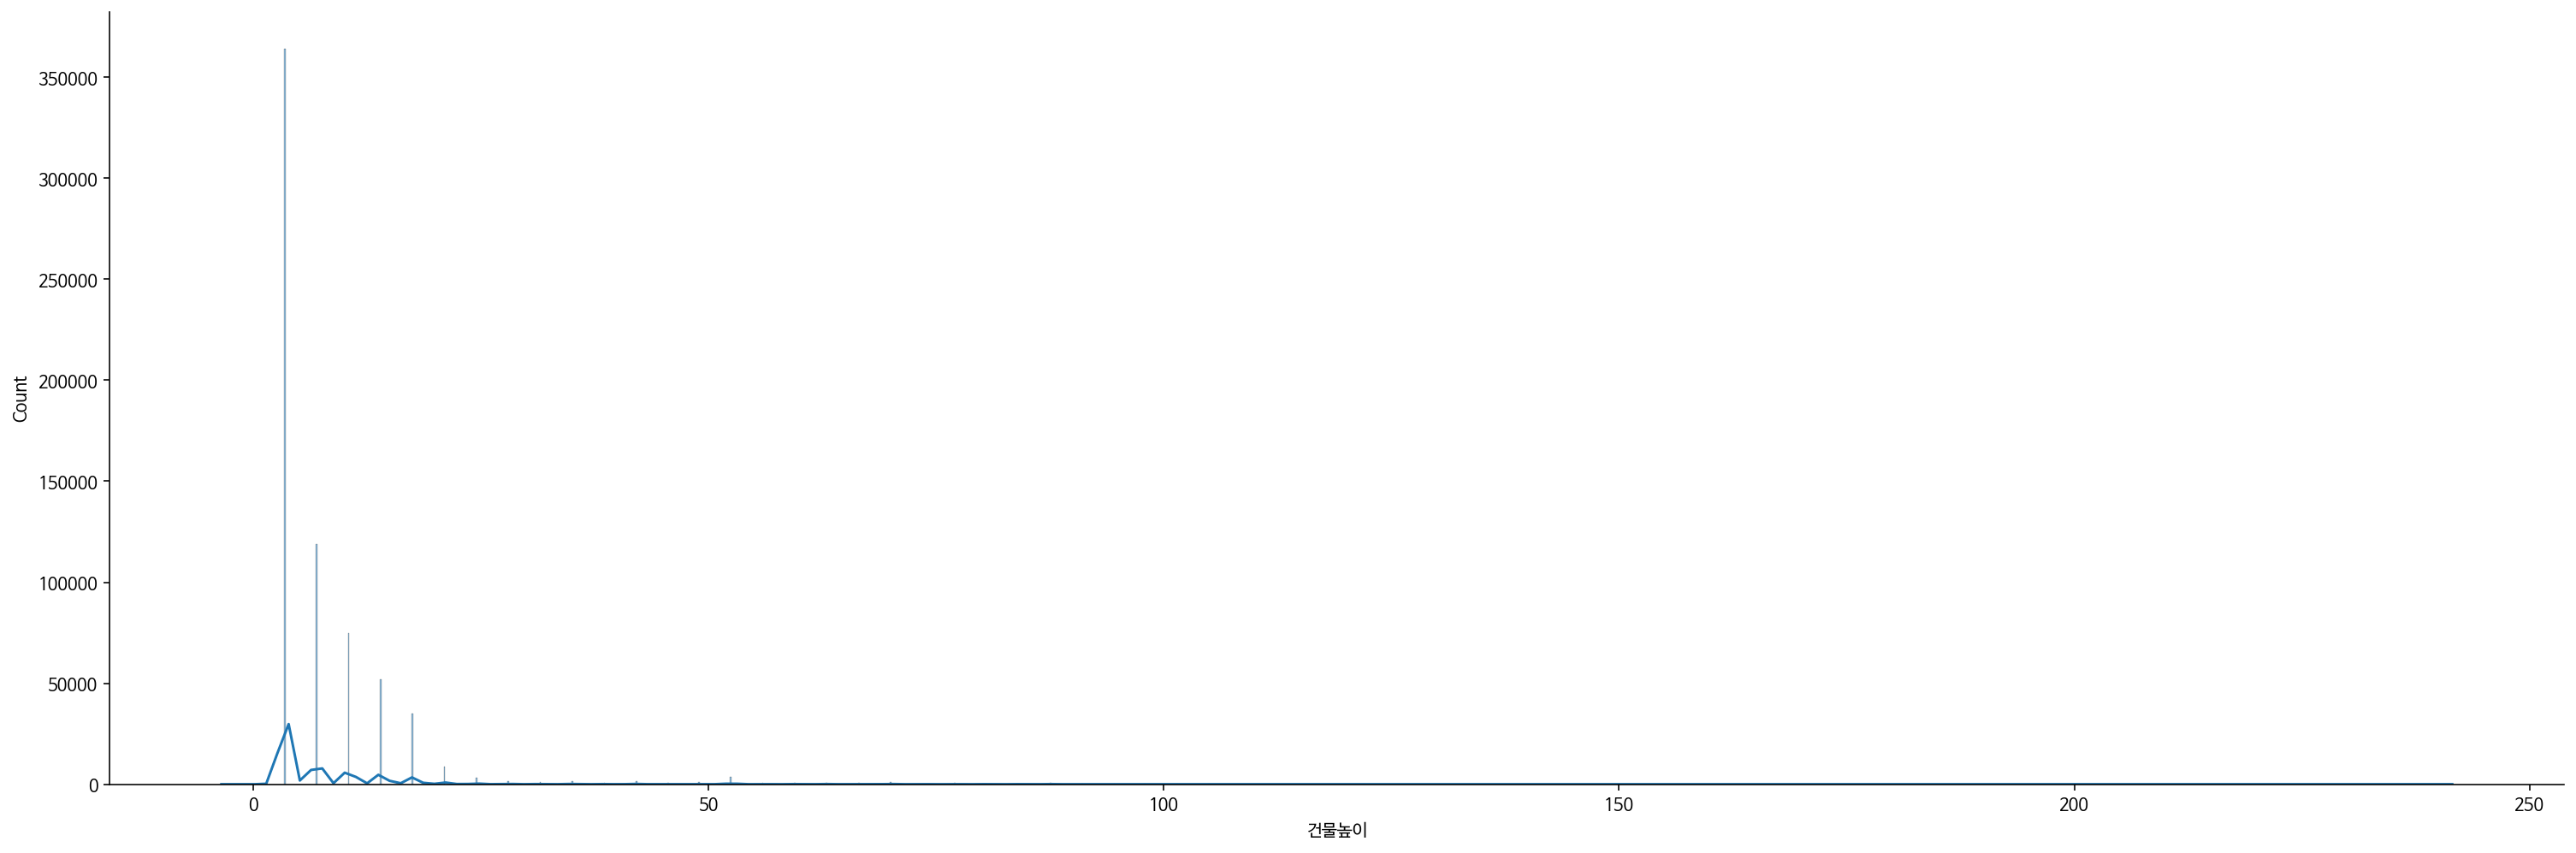

In [24]:
# Target의 확률밀도함수 
sns.displot(df['건물높이'], kde=True, height = 7, aspect = 3) 

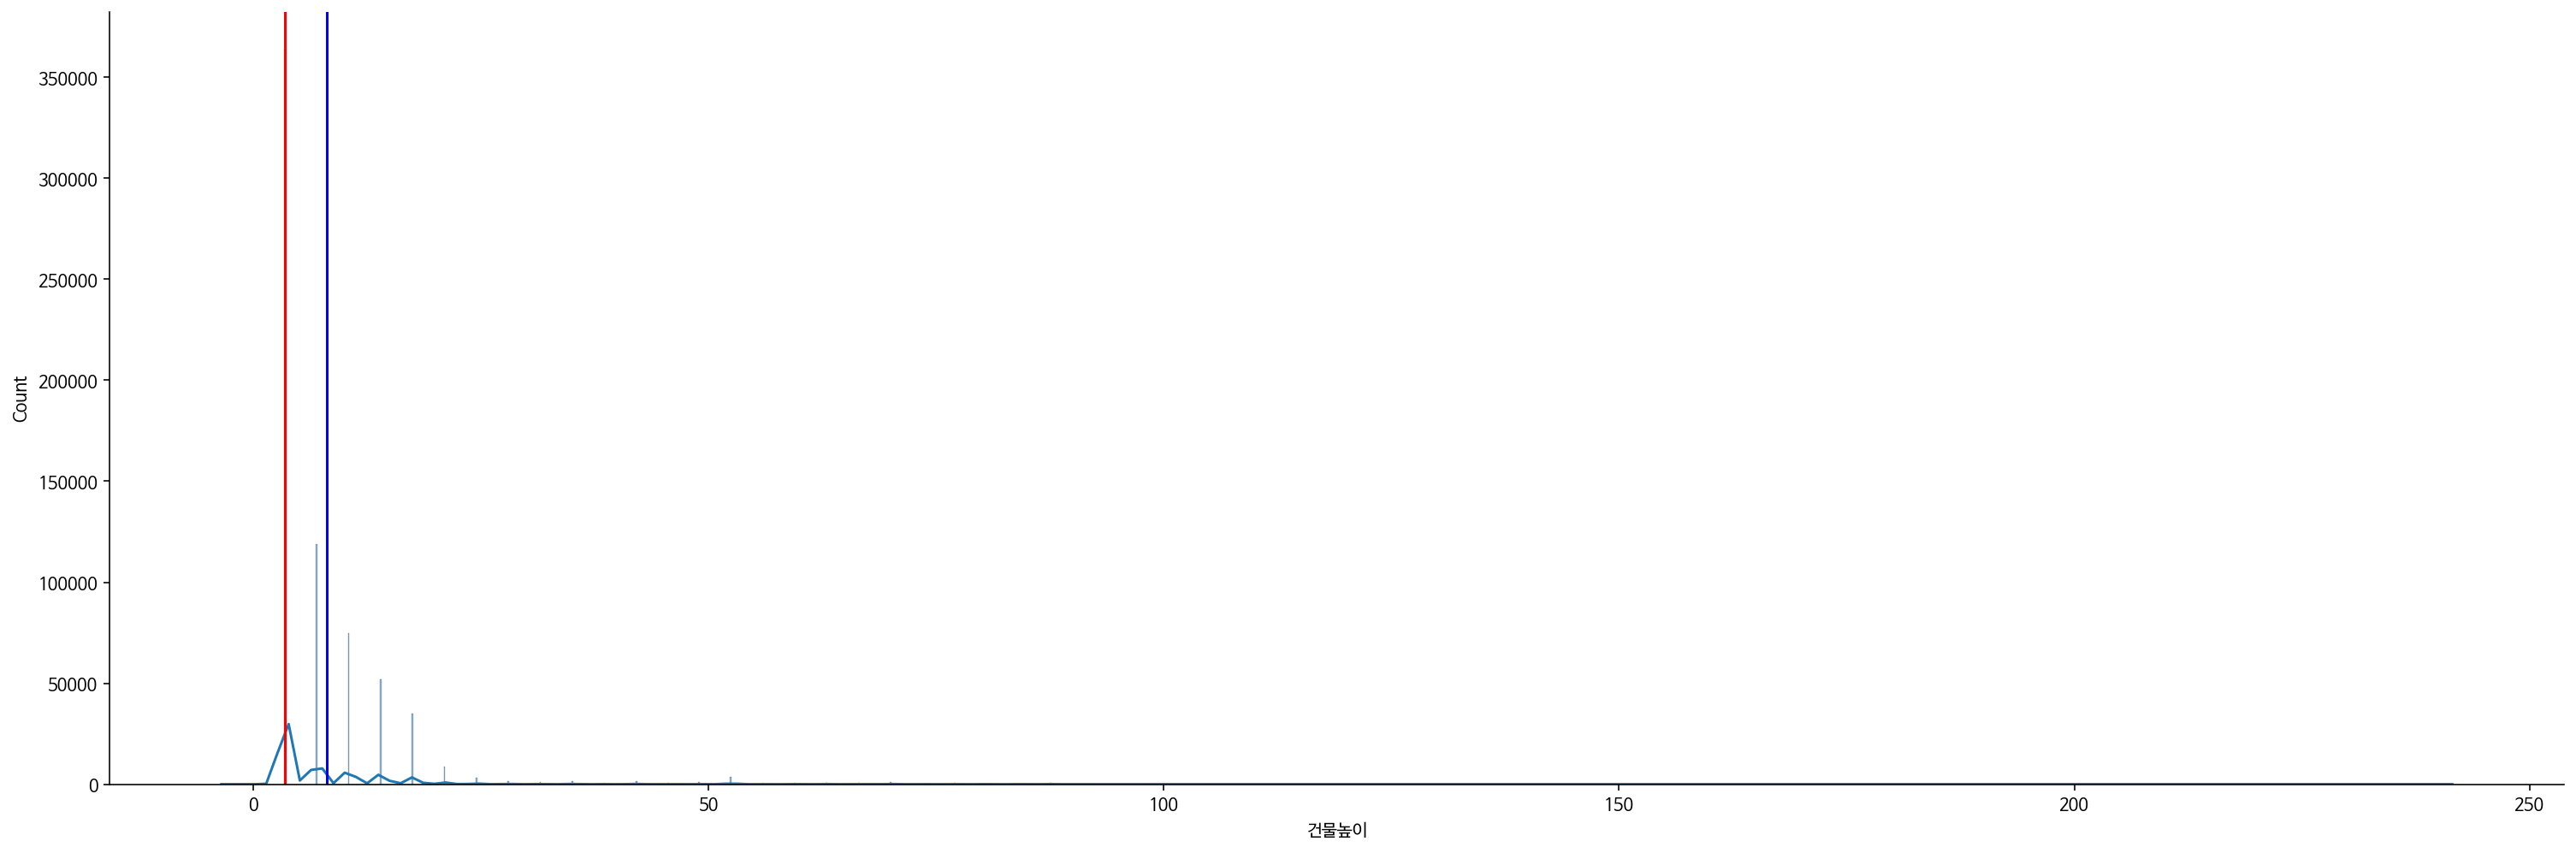

In [25]:
# Target의 확률밀도함수
sns.displot(df['건물높이'], kde=True, height = 7, aspect = 3) # right-skewed - 이상치 제거 or 향후 정규분포 형태로 변환


# 평균과, 중간값으로 수직선을 그리기
plt.axvline(df['건물높이'].mean(), color='blue')
plt.axvline(df['건물높이'].median(), color='red');

#### 이상치 확인

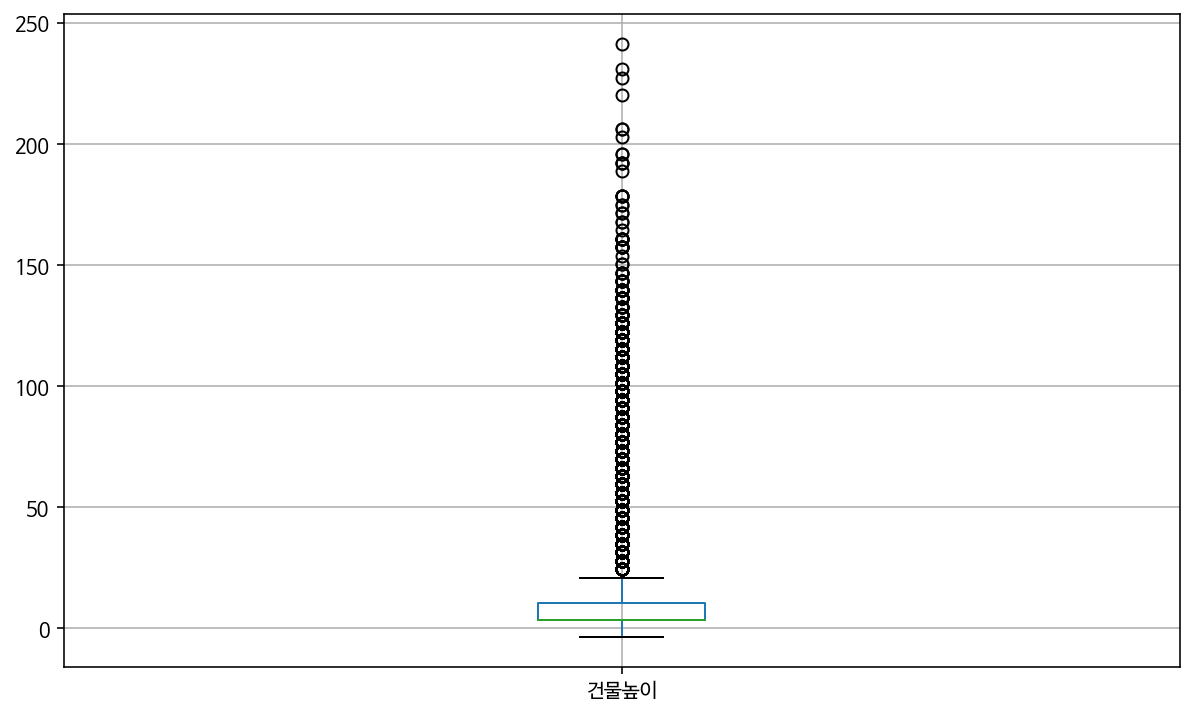

In [26]:
# boxplot으로 데이터 분포와 이상치 확인
df.boxplot(column=['건물높이'], figsize=(10,6))

In [27]:
df[df['건물높이'] >=200]  # 63빌딩의 높이가 249.6m이므로 잘못된 데이터는 아니다 - 하지만 데이터 분포에서 너무 큰 값을 나타내므로 이상치로 판단하여 제거할지에 대한 판단은 나의 몫이다

,건물관리번호,층수,건물높이,건물면적,총에너지량,1월에너지량,2월에너지량,3월에너지량,4월에너지량,5월에너지량,...,10월에너지량,11월에너지량,12월에너지량,1분기에너지량,2분기에너지량,3분기에너지량,4분기에너지량,음영도,x좌표,y좌표
90848,90848,63,220.50000,4777.96517,633.20528,5.94563,15.81148,40.32028,72.14450,103.62859,...,22.71838,9.13144,4.43319,62.07739,289.46124,245.38365,36.28301,11560,950490.83766,1946847.47194
106431,106431,66,231.00000,9838.11293,607.05415,15.23623,25.47939,48.44416,66.64516,85.53646,...,33.40265,16.76977,8.56357,89.15979,242.64022,216.51817,58.73598,11470,944767.84966,1947712.28542
168249,168249,59,206.50000,1730.16971,898.92270,20.48538,36.19855,72.62719,101.15544,127.48074,...,48.45971,22.86547,11.42796,129.31112,362.40988,324.44857,82.75313,11680,960685.96961,1943382.30666
173444,173444,69,241.50000,2253.50007,792.31693,18.41276,31.52824,62.20176,87.56586,112.94982,...,41.80241,20.37898,10.38704,112.14276,323.08342,284.52232,72.56843,11680,960470.74791,1943193.28499
174129,174129,65,227.50000,1731.55525,917.65998,23.63951,38.83487,74.16061,101.60128,128.07864,...,50.89875,25.84324,13.40367,136.63499,364.42475,326.45457,90.14567,11680,960645.37696,1943316.45920
175529,175529,59,206.50000,1731.26094,901.28231,23.23859,37.83595,71.00671,99.73475,126.75580,...,49.12534,25.40591,13.13066,132.08124,360.56420,320.97496,87.66191,11680,960604.79840,1943250.66133
317794,317794,58,203.00000,1501.17894,919.97503,22.86447,38.56891,74.53864,102.23499,128.93823,...,50.81616,25.19887,12.83781,135.97202,366.44846,328.70171,88.85283,11215,962214.05120,1948840.07307


In [28]:
df[df['건물높이'] <= 0]

,건물관리번호,층수,건물높이,건물면적,총에너지량,1월에너지량,2월에너지량,3월에너지량,4월에너지량,5월에너지량,...,10월에너지량,11월에너지량,12월에너지량,1분기에너지량,2분기에너지량,3분기에너지량,4분기에너지량,음영도,x좌표,y좌표
233141,233141,-1,-3.50000,17.71402,424.90637,5.82712,9.07474,16.90974,37.50979,76.90571,...,11.59994,6.30272,3.58971,31.81160,210.46218,161.14021,21.49238,11440,947274.80467,1952428.64161


In [29]:
a[a['건물높이'] < 0]  # '시영종합상가하나로마트성산점'를 검색해보니 지하 1층에 위치한 것은 맞으나, 건물 자체는 2층짜리 건물이므로 이상치로 판단하여 데이터를 삭제

,건물관리번호,건물명,층수,건물높이,건물면적,총에너지량,1월에너지량,2월에너지량,3월에너지량,4월에너지량,...,10월에너지량,11월에너지량,12월에너지량,1분기에너지량,2분기에너지량,3분기에너지량,4분기에너지량,음영도,x좌표,y좌표
249291,1807252860,시영종합상가하나로마트성산점,-1,-3.50000,17.71402,424.90637,5.82712,9.07474,16.90974,37.50979,...,11.59994,6.30272,3.58971,31.81160,210.46218,161.14021,21.49238,11440,947274.80467,1952428.64161


In [30]:
df = df.drop(df.index[233141])
df.reset_index(drop=True, inplace=True)
df[df['건물높이'] <= 0]

,건물관리번호,층수,건물높이,건물면적,총에너지량,1월에너지량,2월에너지량,3월에너지량,4월에너지량,5월에너지량,...,10월에너지량,11월에너지량,12월에너지량,1분기에너지량,2분기에너지량,3분기에너지량,4분기에너지량,음영도,x좌표,y좌표


In [31]:
df.tail(1)

,건물관리번호,층수,건물높이,건물면적,총에너지량,1월에너지량,2월에너지량,3월에너지량,4월에너지량,5월에너지량,...,10월에너지량,11월에너지량,12월에너지량,1분기에너지량,2분기에너지량,3분기에너지량,4분기에너지량,음영도,x좌표,y좌표
674768,674769,4,14.00000,2746.50684,1197.20614,44.92887,62.28320,108.41203,139.33360,162.48337,...,58.59097,27.09584,13.27886,215.62410,472.72310,409.89327,98.96567,11350,962334.65921,1959598.77344


### 2) 가설 설정

-	가설 1. 건물 높이가 높을 수록 음영도가 줄어들 것이다.

-	가설 2. 건물 높이가 높아질수록 평균 총 에너지량이 많아질 것이다.

-	가설 3. 일년 중 낮의 길이가 짧은 달인 12월에는 태양의 고도가 낮아져 건물 높이가 높아질수록 12월에너지량이 감소할 것이다.



### 가설 1. 건물 높이가 높을 수록 음영도가 줄어들 것이다.

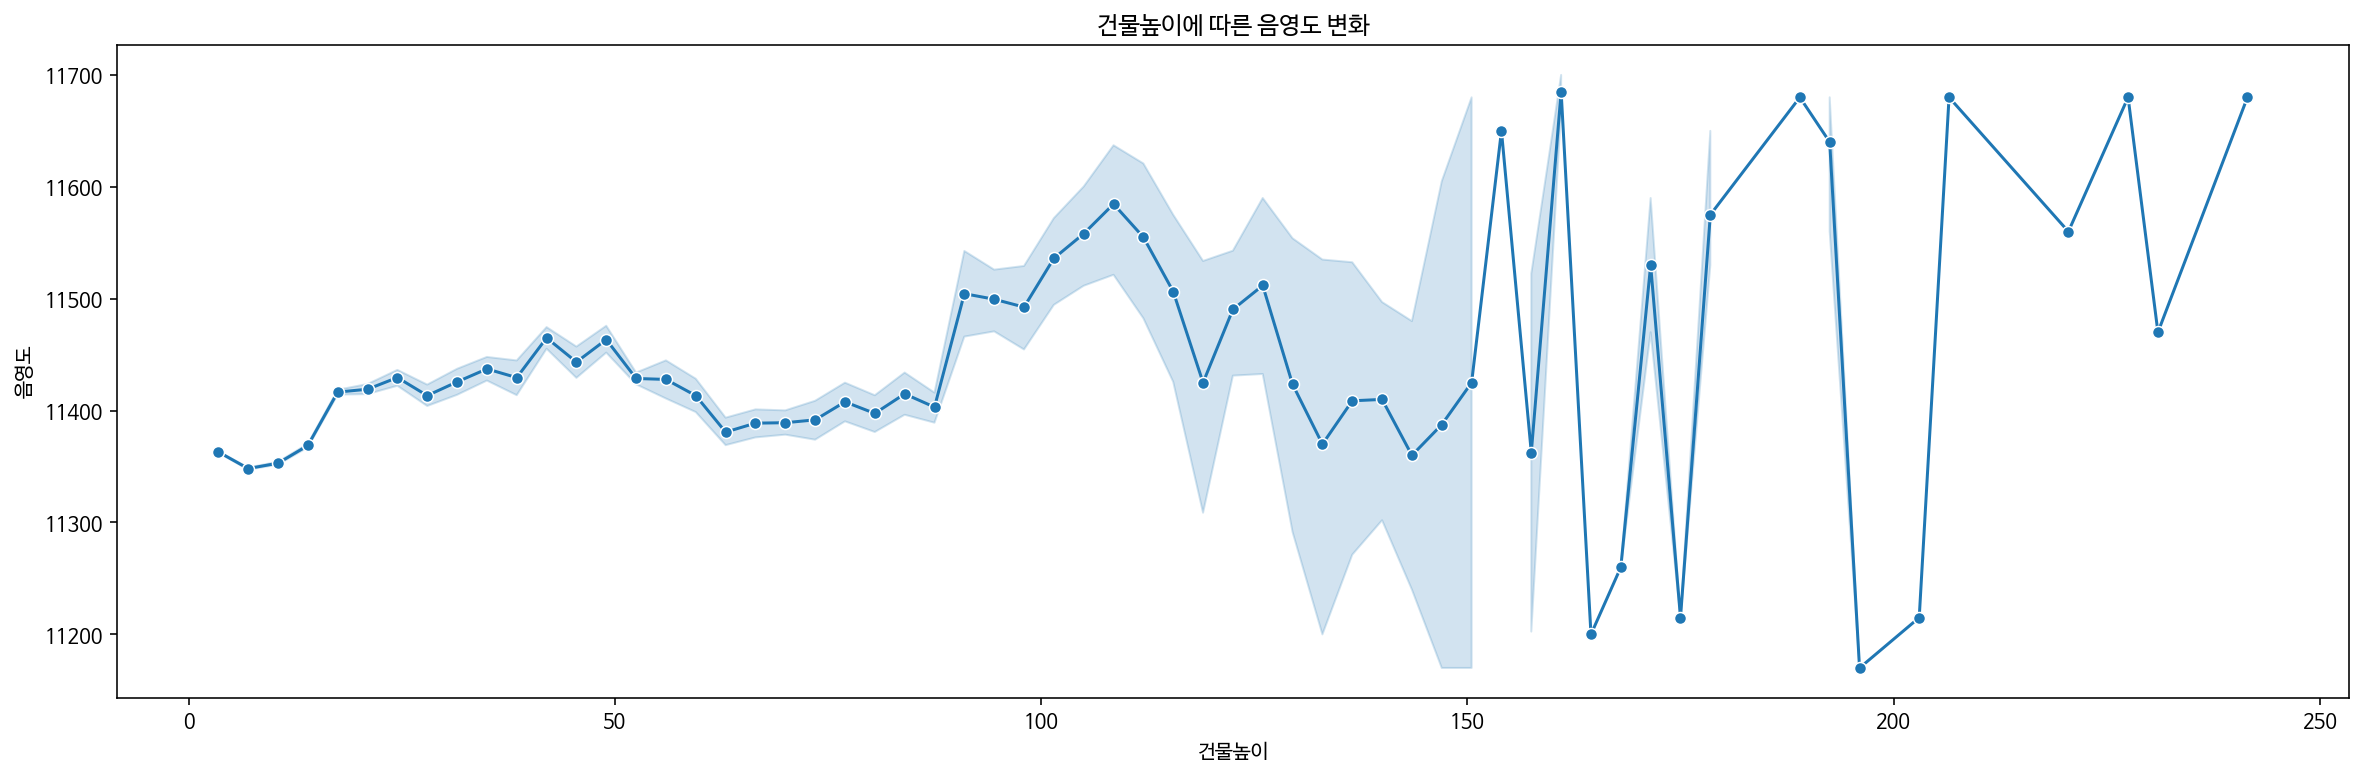

In [32]:
# '건물높이에 따른 음영도 변화' 그래프 시각화 - 건물높이는 실수형의 연속된 값을 가지므로 선그래프로 표현한다.
fig = plt.figure(figsize=(20, 6))
fig.set_facecolor('white')
sns.lineplot(data=df, x='건물높이', y='음영도', marker='o') # 범주를 지정하지 않아 최대/최소 음영도의 범위가 표시되고, 파란 실선은 각 건물높이마다 음영도의 평균을 계산한 값
plt.title('건물높이에 따른 음영도 변화')
plt.show()

그래프의 일부분에서 건물 높이가 높아질수록 음영도가 줄어드는 양상을 보이긴하나, 전체적으로 평균 실선 그래프를 봤을 때, 음영도가 줄어드는 추세를 보이진 않는다.

그 이유는 예를 들어 여의도와 같이 주변에 높은 건물이 많으면 건물이 높아도 서로에게 가려져 음영도가 높을 수 있고, 서울은 산악에 둘러싸인 분지지형을 이루고 있으므로 주변에 산과 같은 높은 지형이 있거나 지형이 평탄하지 않은 경우 건물이 높아도 음영도가 높을 수 있다. 반대로 강변에 위치한 건물의 경우, 음영도가 낮을 수 있다.

따라서 가설 1은 주변환경의 영향을 고려하지 않은 잘못된 가설이다.

### 가설 2. 건물 높이가 높아질수록 평균 총 에너지량이 많아질 것이다.

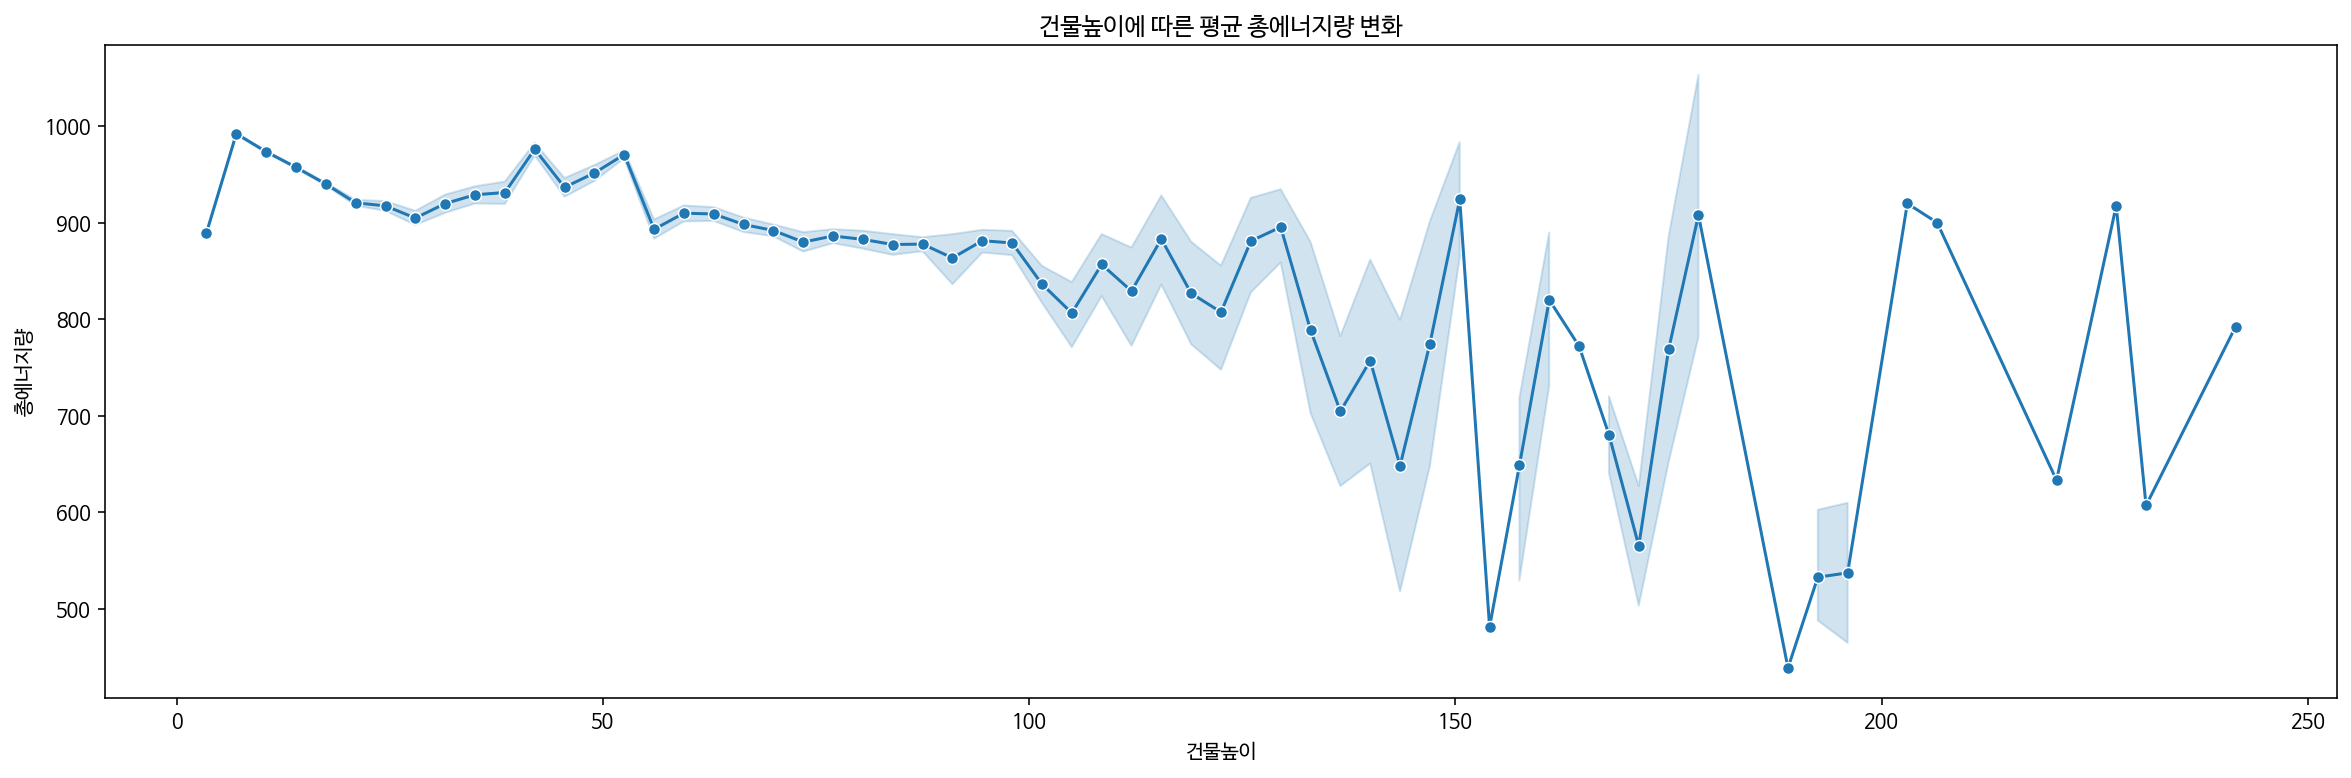

In [33]:
# '건물높이에 따른 평균 총에너지량 변화' 선그래프 시각화
fig = plt.figure(figsize=(20, 6))
fig.set_facecolor('white')
sns.lineplot(data=df, x='건물높이', y='총에너지량',marker='o') # 범주를 지정하지 않아 최대/최소 음영도의 범위가 표시되고, 파란 실선은 각 건물높이마다 음영도의 평균을 계산한 값
plt.title('건물높이에 따른 평균 총에너지량 변화')
plt.show()

건물 높이가 높아질수록 음영도가 낮아져 평균 총 에너지량이 많아질 것이라고 가설을 설정하였으나, 가설과는 반대로 건물높이 200m까지는 평균 총 에너지량이 줄어드는 추세를 보인다.

이유 1) 가설 1에 의해 건물의 밀집도, 지형에 따라 음영도가 달라질 수 있으므로 음영도에 따라 총에너지양이 달라질 수 있다. 위의 약 190m의 위치는 음영도가 아주 높게 나온 위치임을 확인할 수 있다.

이유 2) 해가 동쪽에서 떠서 서쪽으로 지기 때문에, 태양의 고도가 낮은 상태에서 높아진 후, 다시 낮아지므로 건물이 낮을수록 낮은 고도일 때도 태양열을 많이 받을 수 있어 평균 총 에너지량이 높을 가능성이 있다.
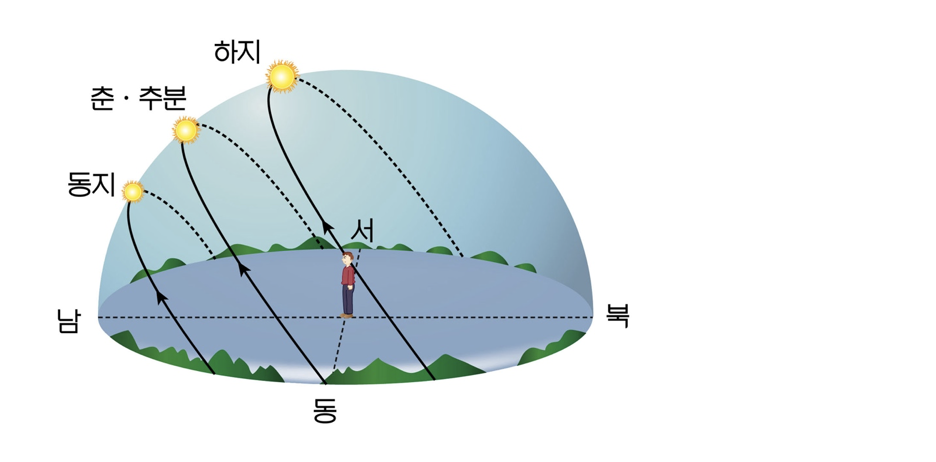


따라서 지형과 음영도, 태양의 고도의 영향을 받으므로 가설 2는 틀린 가설이다. 

### 가설 3. 일년 중 낮의 길이가 짧은 달인 12월에는 태양의 고도가 낮아져 건물 높이가 높아질수록 12월에너지량이 감소할 것이다.

- 일년 중 낮의 길이가 짧은 달의 순서는 기상청 통계에 근거한다.

  12월 < 1월 < 11월 < 2월 < 10월 < 3월 < 9월 < 4월 < 8월 < 7월 < 5월 < 6월

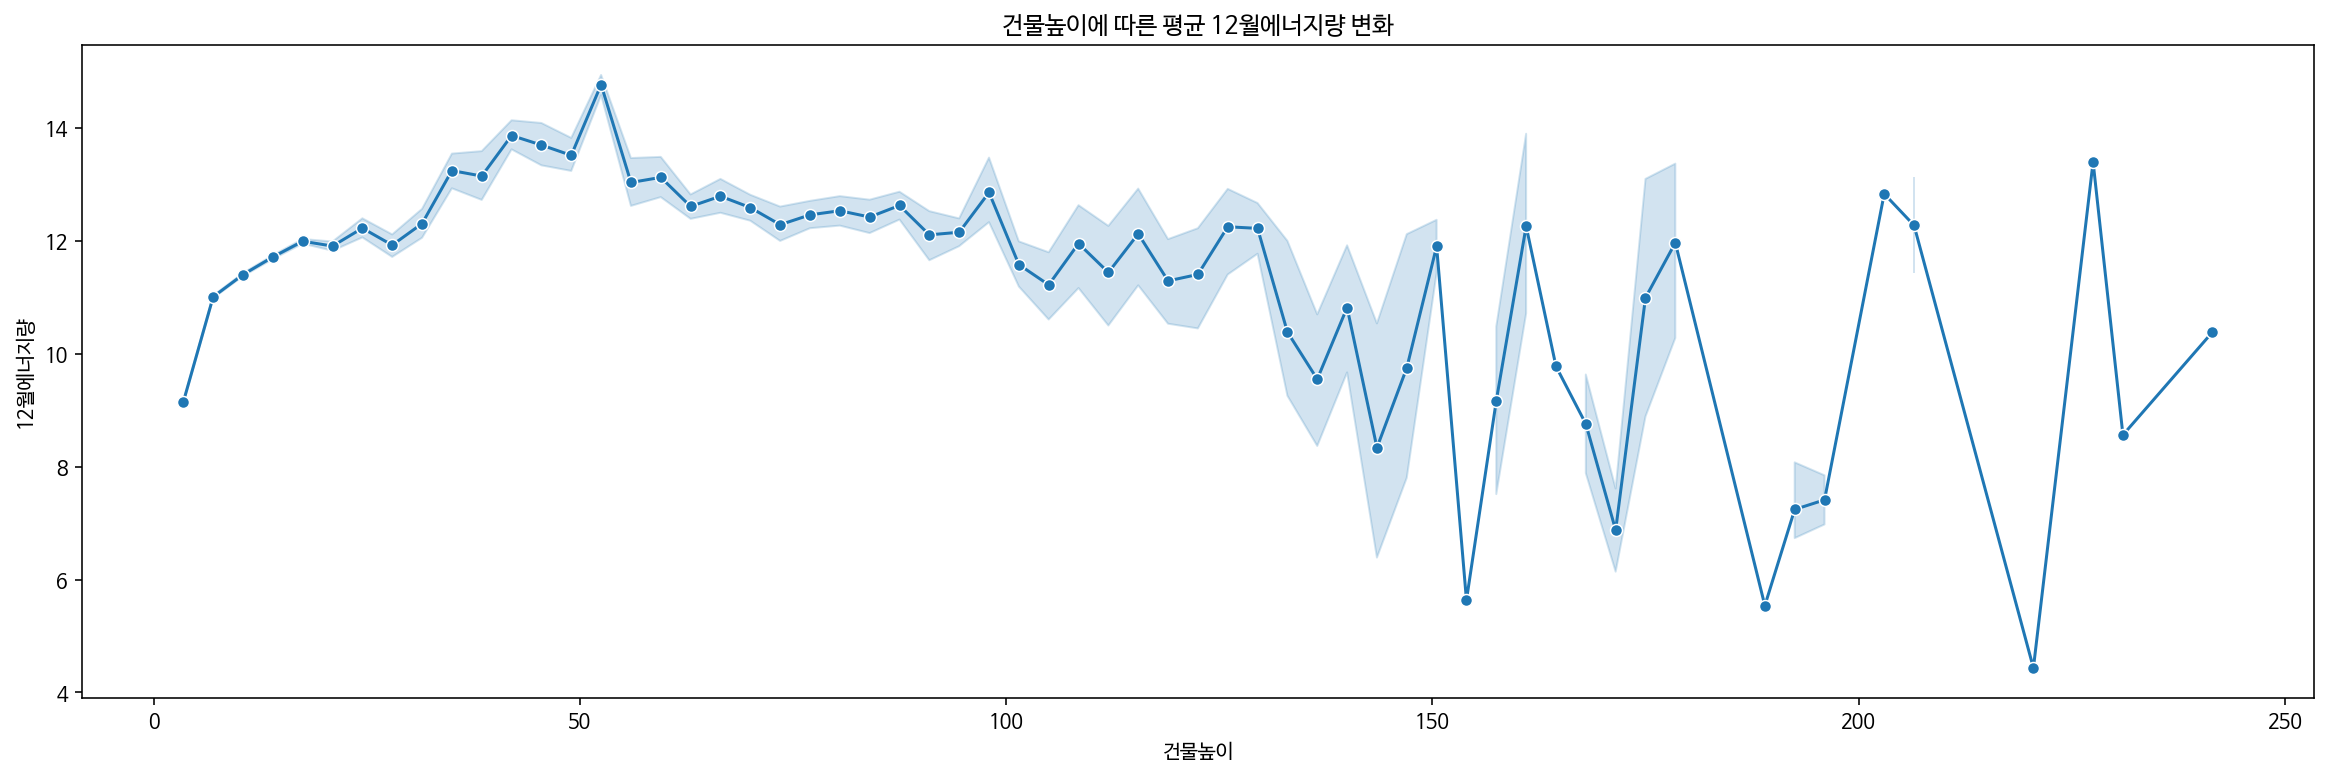

In [34]:
# '건물높이에 따른 평균 12월에너지량 변화' 그래프 시각화
fig = plt.figure(figsize=(20, 6))
fig.set_facecolor('white')
sns.lineplot(data=df, x='건물높이', y='12월에너지량', marker = 'o') # 범주를 지정하지 않아 최대/최소 음영도의 범위가 표시되고, 파란 실선은 각 건물높이마다 음영도의 평균을 계산한 값
plt.title('건물높이에 따른 평균 12월에너지량 변화')
plt.show()

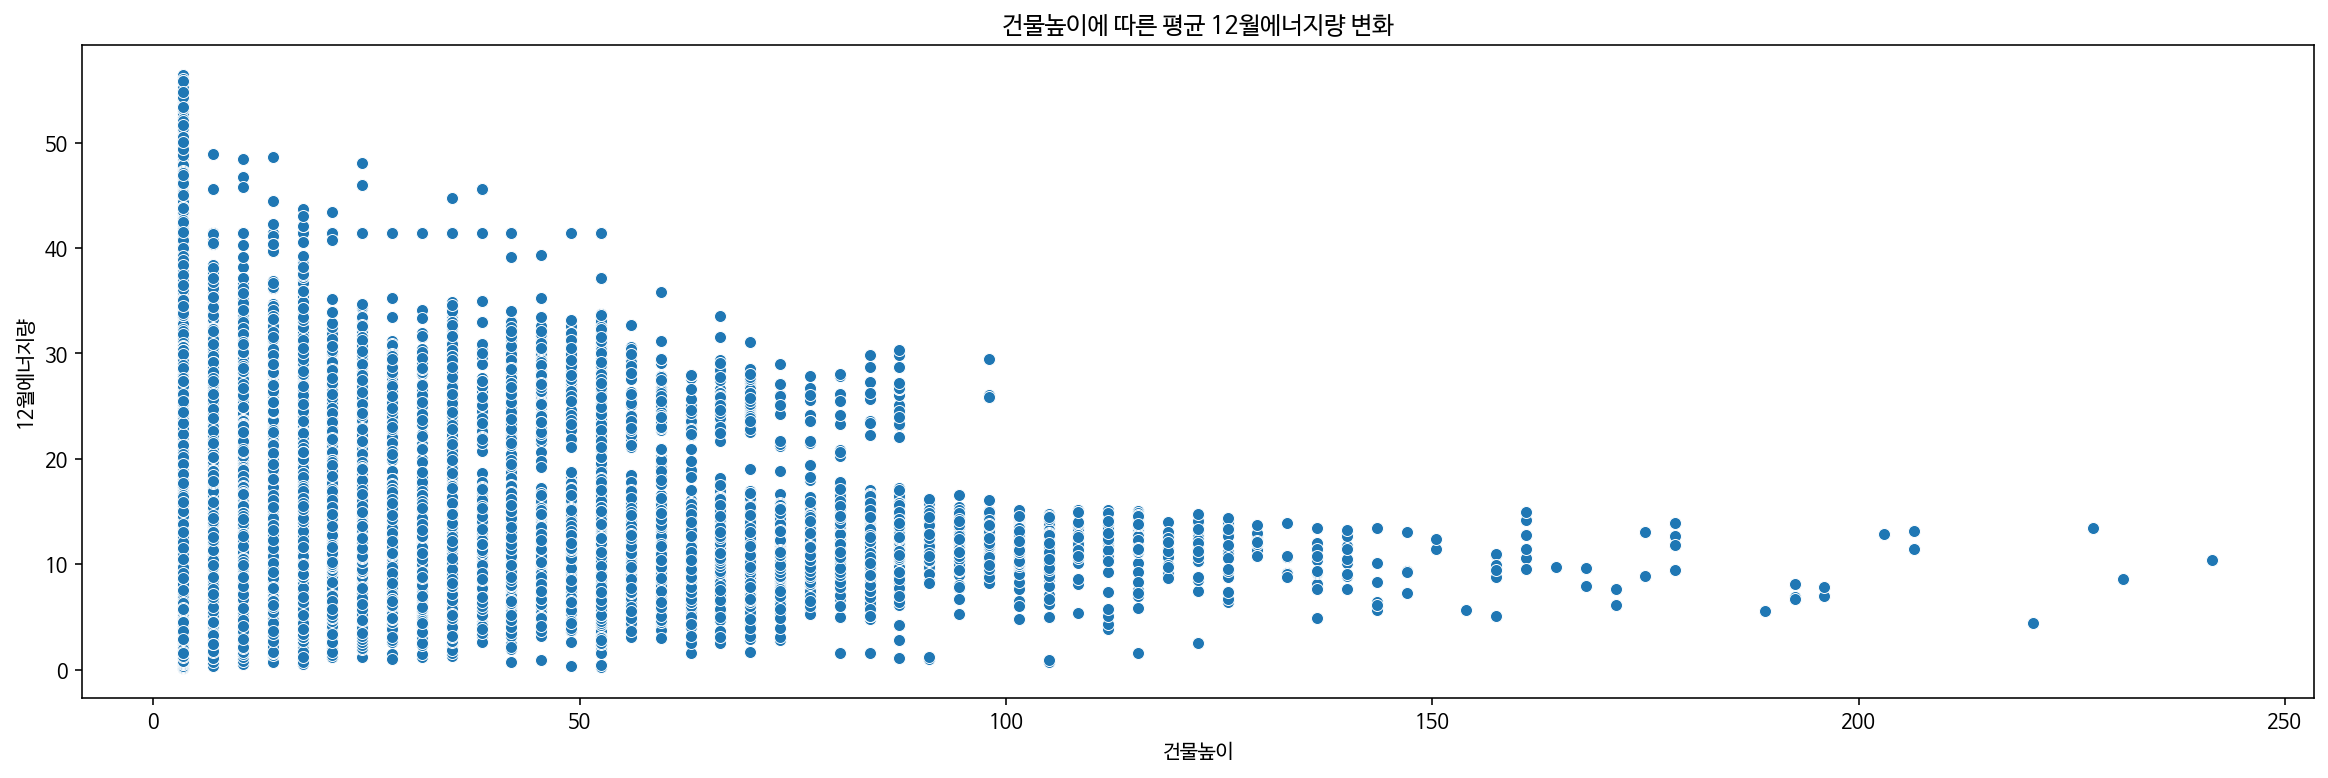

In [35]:
# '건물높이에 따른 평균 12월에너지량 변화' 산점도 그래프 시각화
fig = plt.figure(figsize=(20, 6))
fig.set_facecolor('white')
sns.scatterplot(data=df, x='건물높이', y='12월에너지량') # 범주를 지정하지 않아 최대/최소 음영도의 범위가 표시되고, 파란 실선은 각 건물높이마다 음영도의 평균을 계산한 값
plt.title('건물높이에 따른 평균 12월에너지량 변화')
plt.show()

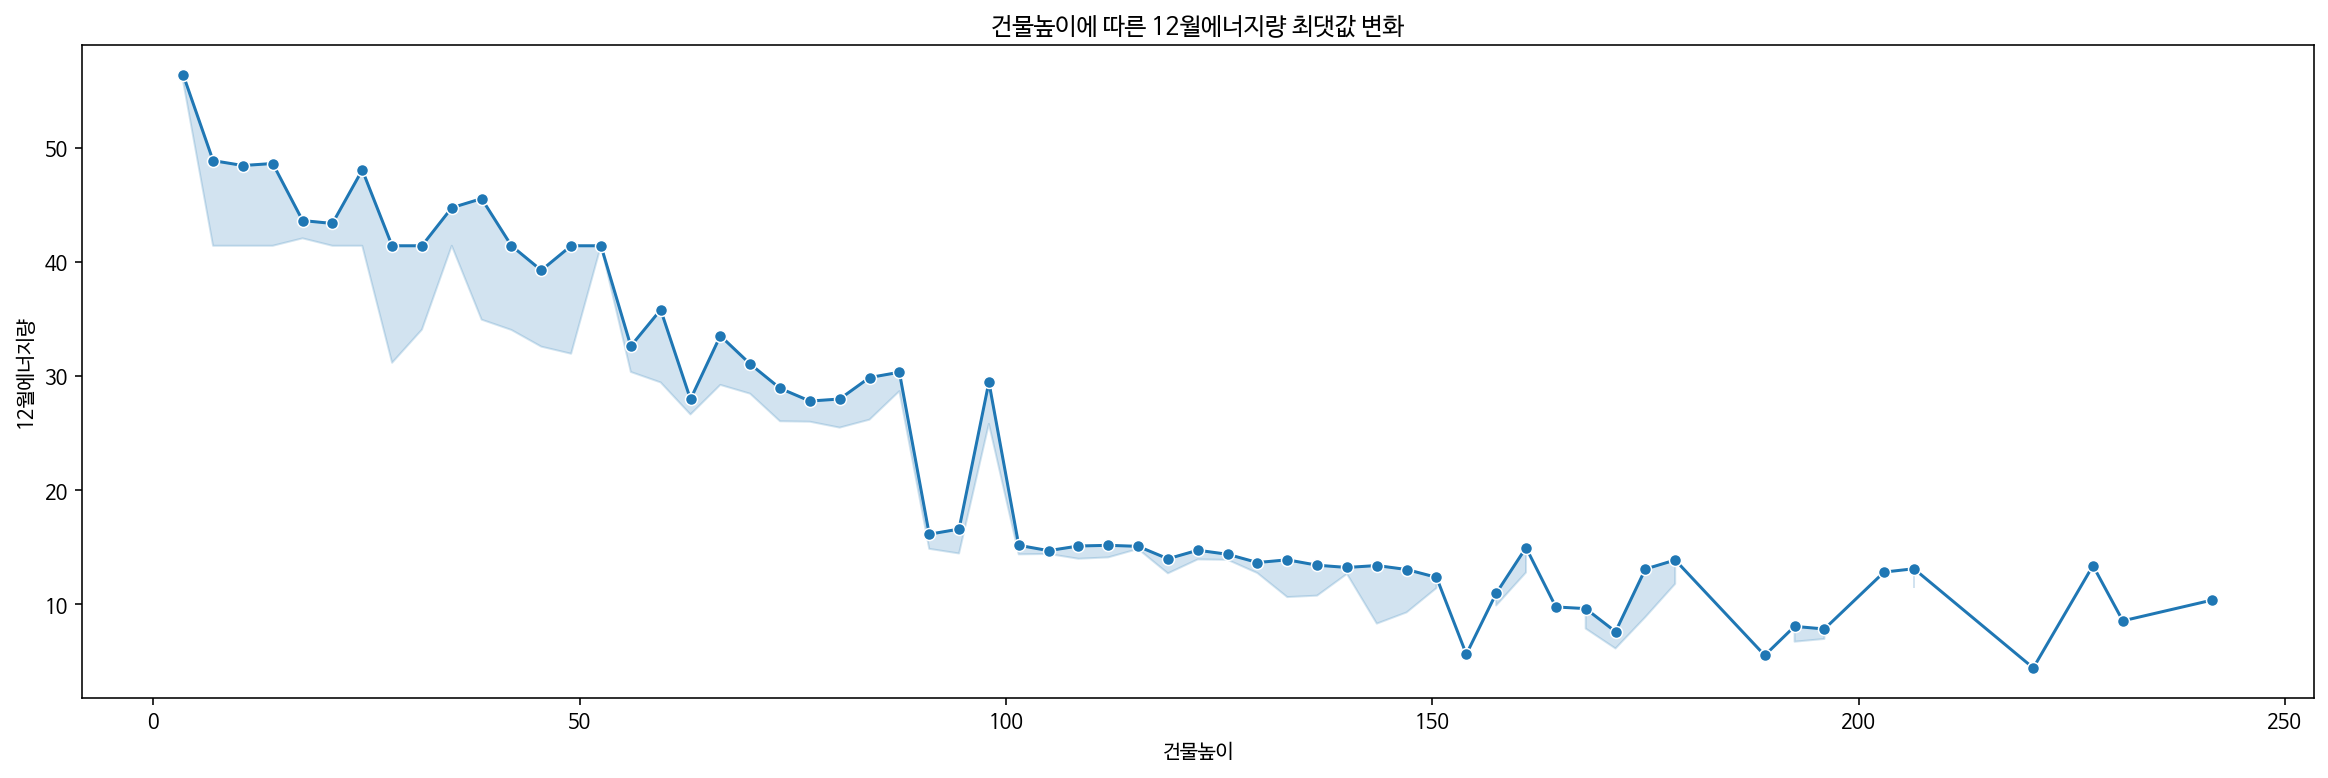

In [36]:
# '건물높이에 따른 12월에너지량 최댓값 변화' 그래프 시각화
fig = plt.figure(figsize=(20, 6))
fig.set_facecolor('white')
sns.lineplot(data=df, x='건물높이', y='12월에너지량', estimator=np.max, marker = 'o') # 범주를 지정하지 않아 최대/최소 음영도의 범위가 표시되고, 파란 실선은 각 건물높이마다 음영도의 평균을 계산한 값
plt.title('건물높이에 따른 12월에너지량 최댓값 변화')
plt.show()

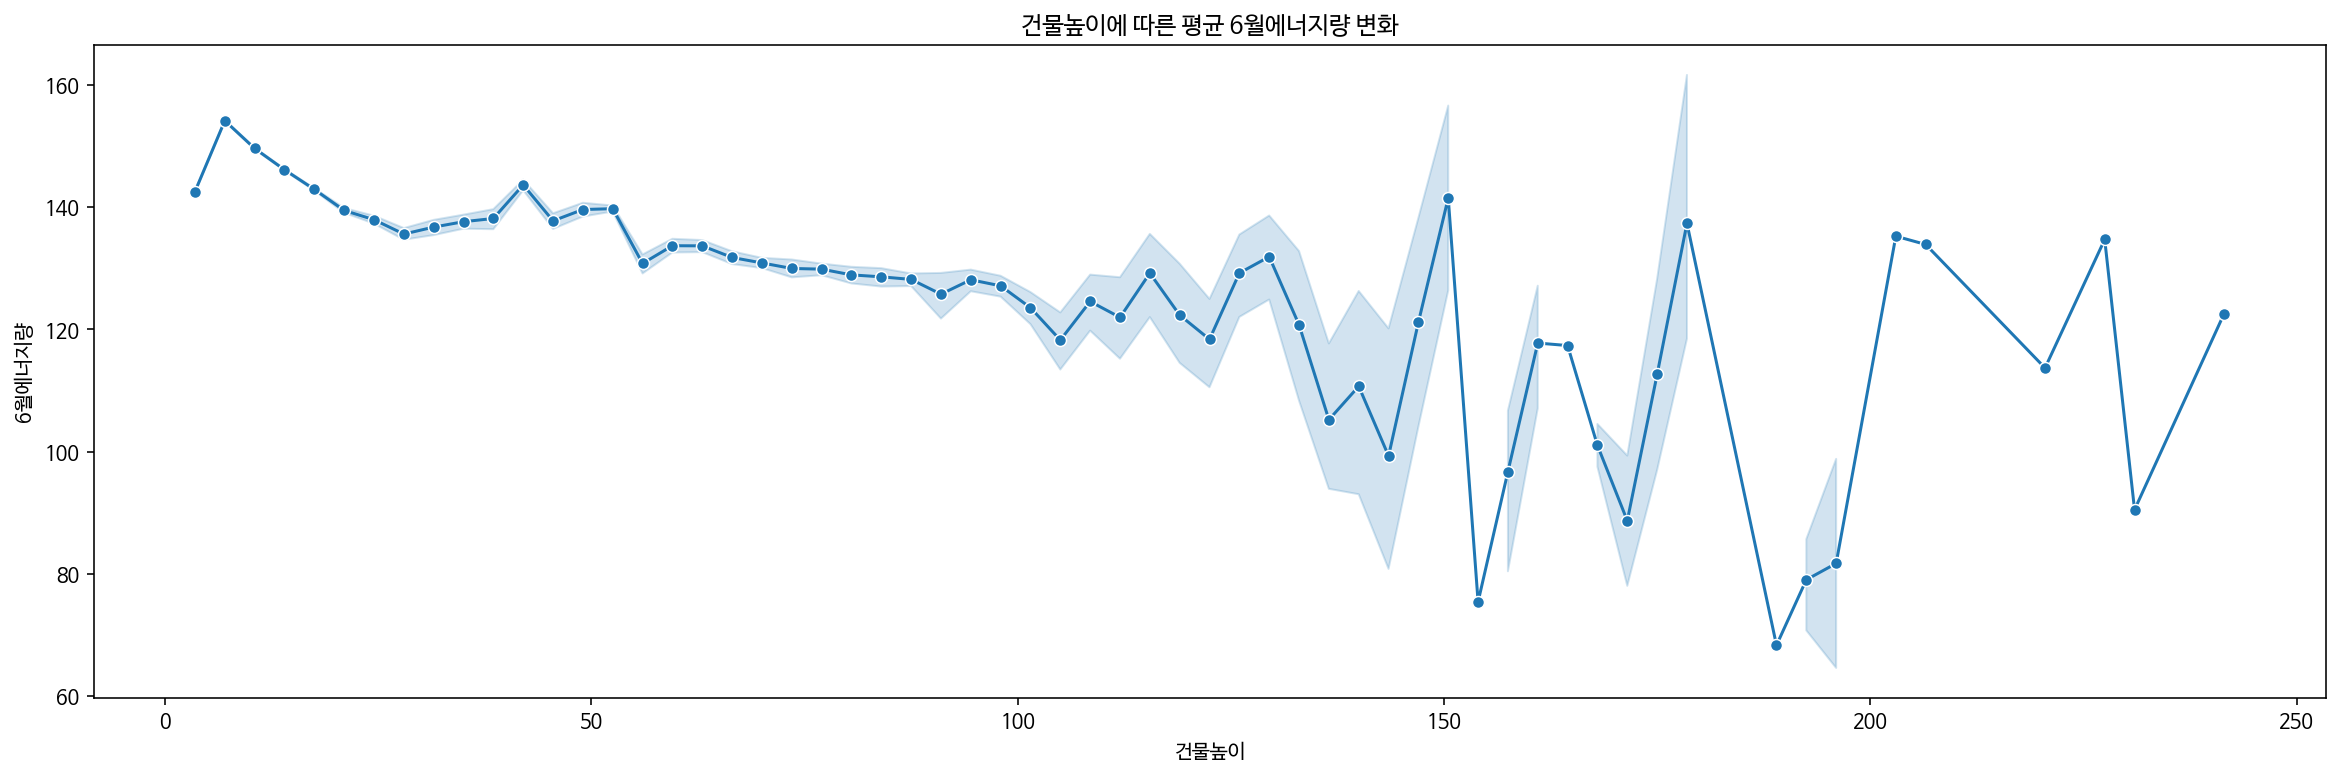

In [37]:
# '건물높이에 따른 평균 6월에너지량 변화' 그래프 시각화
fig = plt.figure(figsize=(20, 6))
fig.set_facecolor('white')
sns.lineplot(data=df, x='건물높이', y='6월에너지량', marker = 'o') # 범주를 지정하지 않아 최대/최소 음영도의 범위가 표시되고, 파란 실선은 각 건물높이마다 음영도의 평균을 계산한 값
plt.title('건물높이에 따른 평균 6월에너지량 변화')
plt.show()

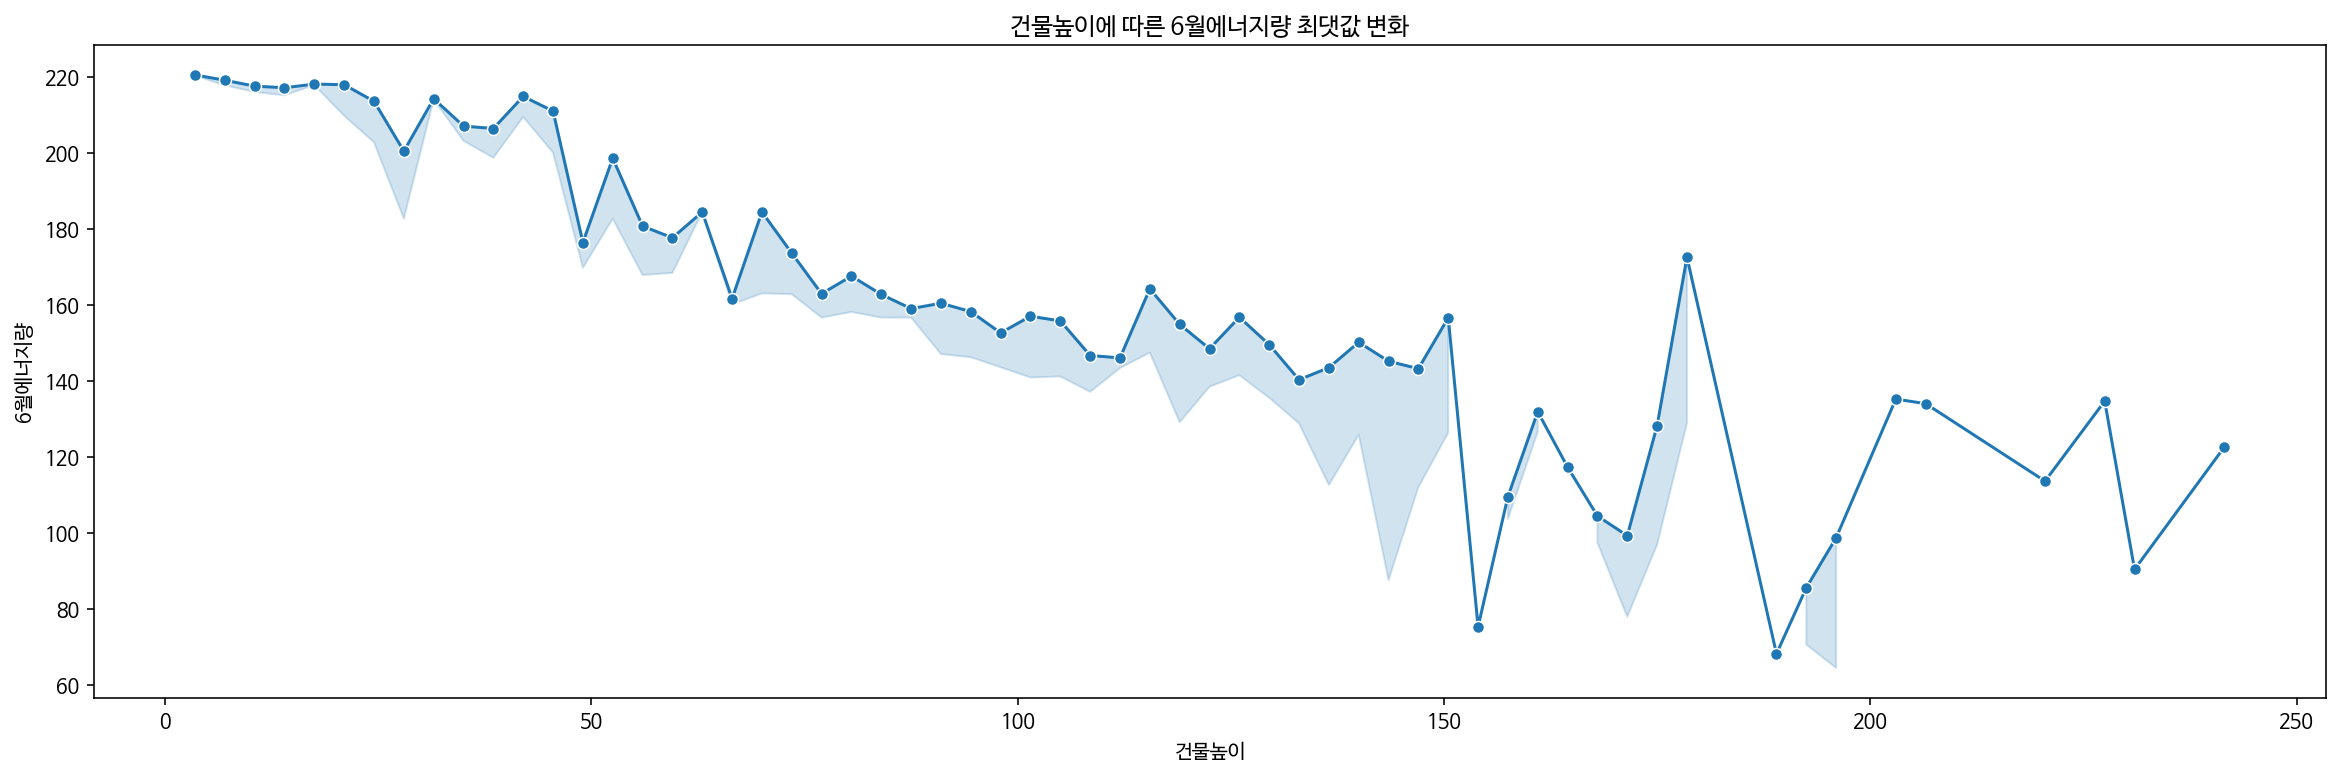

In [38]:
# '건물높이에 따른 6월에너지량 최댓값 변화' 그래프 시각화
fig = plt.figure(figsize=(20, 6))
fig.set_facecolor('white')
sns.lineplot(data=df, x='건물높이', y='6월에너지량', estimator=np.max, marker = 'o') # 범주를 지정하지 않아 최대/최소 음영도의 범위가 표시되고, 파란 실선은 각 건물높이마다 음영도의 평균을 계산한 값
plt.title('건물높이에 따른 6월에너지량 최댓값 변화')
plt.show()

대체적으로 가설과 같이 건물 높이가 높아질수록 평균 12월 에너지량이 줄어드는 추세를 보이는 것을 확인할 수 있다.

추가적으로 낮의 길이가 가장 긴 달인 6월의 에너지량도 함께 살펴보았을 때, 건물이 높을수록 에너지량이 줄어드는 추세를 보이는 것을 확인할 수 있다.

건물 높이가 높아질수록 12월 에너지량의 최대값이 10이하로 존재하고, 6월 에너지량의 최대값은 80이상이므로 태양의 고도와 낮의 길이가 영향을 미쳤음을 알 수 있다.

따라서 가설 2,3을 통해 태양의 고도와 건물높이와의 상관관계가 있다는 것을 알 수 있다.


# 3. Modeling

## Split Data

In [32]:
# Hold-out validation - train/validation/test
from sklearn.model_selection import train_test_split

target = '건물높이'
features = df.columns.drop(target) 

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((431852, 23), (431852,), (107963, 23), (107963,), (134954, 23), (134954,))

In [33]:
X_train.columns

Index(['건물관리번호', '층수', '건물면적', '총에너지량', '1월에너지량', '2월에너지량', '3월에너지량', '4월에너지량',
       '5월에너지량', '6월에너지량', '7월에너지량', '8월에너지량', '9월에너지량', '10월에너지량', '11월에너지량',
       '12월에너지량', '1분기에너지량', '2분기에너지량', '3분기에너지량', '4분기에너지량', '음영도', 'x좌표',
       'y좌표'],
      dtype='object')

## a) Baseline Model

In [34]:
# Target인 '건물높이'의 평균을 기준모델로 사용

# '건물높이'의 평균
mean = df['건물높이'].mean()
print('mean : ',mean)

# 기준모델 : '건물높이' 평균값으로 예측
predict = y_train.mean()
print('predict : ', predict)

# 기준모델로 훈련 에러(MAE) 계산
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'train error(MAE) : {mae:.2f}')  # 평균 5m정도 잘못 예측
print(f'train error(R2) : {r2:.2f}')  # R-squared : 1에 가까울수록 설명력이 높다 -> 0이므로 성능 매우 안좋음


# validation 에러(MAE)
y_pred = [predict] * len(y_val)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'validation error(MAE) : {mae:.2f}')
print(f'validation error(R2) : {r2:.2f}')

mean :  8.116187169238659
predict :  8.122029074775618
train error(MAE) : 5.38
train error(R2) : 0.00
validation error(MAE) : 5.37
validation error(R2) : -0.00


## b) Trainig Model

### 다중선형회귀모델

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()

model.fit(X_train, y_train)

# train error
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_train, y_pred)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))
print("R2 : ", round(r2,2))


# validation error
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))
print("R2 : ", round(r2,2)) 

,Metric,Score
0,MSE,0.00000
1,MAE,0.00000
2,RMSE,0.00000
3,R2,1.00000


R2 :  1.0


,Metric,Score
0,MSE,0.00000
1,MAE,0.00000
2,RMSE,0.00000
3,R2,1.00000


R2 :  1.0


validation set을 이용한 R-squared에서도 1값이 나오고 다른 잔차들의 오류값도 0이므로 데이터를 완벽하게 맞췄음을 알 수 있다. 

이는 데이터 누수가 의심되므로 확인해봐야 한다.


## c) Data Leakage 

In [36]:
X_train.columns # 층수와 높이가 연관성이 높을 것으로 판단되므로 '층수'칼럼을 제외하여 살펴보기

Index(['건물관리번호', '층수', '건물면적', '총에너지량', '1월에너지량', '2월에너지량', '3월에너지량', '4월에너지량',
       '5월에너지량', '6월에너지량', '7월에너지량', '8월에너지량', '9월에너지량', '10월에너지량', '11월에너지량',
       '12월에너지량', '1분기에너지량', '2분기에너지량', '3분기에너지량', '4분기에너지량', '음영도', 'x좌표',
       'y좌표'],
      dtype='object')

In [37]:
# 다중선형회귀모델 학습을 위한 특성 - 층수가 존재하면 예측을 완벽하게 함
features1 = ['층수', '건물면적']
X_train1 = X_train[features1]
X_val1 = X_val[features1]

# 모델 학습
model.fit(X_train1, y_train)

# train error
y_pred = model.predict(X_train1)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_train, y_pred)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))
print("R2 : ", round(r2,2))


# validation error
y_pred = model.predict(X_val1)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))
print("R2 : ", round(r2,2)) 

,Metric,Score
0,MSE,0.00000
1,MAE,0.00000
2,RMSE,0.00000
3,R2,1.00000


R2 :  1.0


,Metric,Score
0,MSE,0.00000
1,MAE,0.00000
2,RMSE,0.00000
3,R2,1.00000


R2 :  1.0


In [38]:
# 다중선형회귀모델 학습을 위한 특성 
features = df.columns.drop([target, '층수', '건물관리번호'])
X_train = X_train[features]
X_val = X_val[features]
X_test = X_test[features]

# 모델 학습
model.fit(X_train, y_train)

# train error
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_train, y_pred)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))
print("R2 : ", round(r2,2))


# validation error
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))
print("R2 : ", round(r2,2)) 

,Metric,Score
0,MSE,75.95396
1,MAE,4.48328
2,RMSE,8.71516
3,R2,0.17703


R2 :  0.18


,Metric,Score
0,MSE,73.06214
1,MAE,4.46178
2,RMSE,8.54764
3,R2,0.19430


R2 :  0.19


데이터 누수의 원인이 '층수' 칼럼이었음을 확인하여 열을 제거하였다.

## d) Feature Selection

In [ ]:
# SelectKBest를 사용해 가장 효과적인 특성 K개 선택
from sklearn.feature_selection import f_regression, SelectKBest

## selctor 정의합니다.
selector = SelectKBest(score_func=f_regression, k=10) # 여러 score 함수 사용 가능, f_regression 주로 사용

## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)

## validation 데이터는 transform
X_val_selected = selector.transform(X_val)


X_train_selected.shape, X_val_selected.shape

((431852, 10), (107963, 10))

In [ ]:
all_names = X_train.columns

## selector.get_support()
selected_mask = selector.get_support()

## 선택된 특성들
selected_names = all_names[selected_mask]

## 선택되지 않은 특성들
unselected_names = all_names[~selected_mask] 

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['건물면적', '1월에너지량', '2월에너지량', '3월에너지량', '10월에너지량', '11월에너지량', '12월에너지량',
       '1분기에너지량', '4분기에너지량', '음영도'],
      dtype='object')
Unselected names:  Index(['총에너지량', '4월에너지량', '5월에너지량', '6월에너지량', '7월에너지량', '8월에너지량', '9월에너지량',
       '2분기에너지량', '3분기에너지량', 'x좌표', 'y좌표'],
      dtype='object')


1 features
Selected names:  Index(['건물면적'], dtype='object')
Test MAE: 4.74
Test R2: 0.15285890174490335 

2 features
Selected names:  Index(['건물면적', '12월에너지량'], dtype='object')
Test MAE: 4.61
Test R2: 0.16602517980671672 

3 features
Selected names:  Index(['건물면적', '11월에너지량', '12월에너지량'], dtype='object')
Test MAE: 4.61
Test R2: 0.16644121048760474 

4 features
Selected names:  Index(['건물면적', '1월에너지량', '11월에너지량', '12월에너지량'], dtype='object')
Test MAE: 4.61
Test R2: 0.1666854597584282 

5 features
Selected names:  Index(['건물면적', '1월에너지량', '11월에너지량', '12월에너지량', '4분기에너지량'], dtype='object')
Test MAE: 4.61
Test R2: 0.169777754296207 

6 features
Selected names:  Index(['건물면적', '1월에너지량', '2월에너지량', '11월에너지량', '12월에너지량', '4분기에너지량'], dtype='object')
Test MAE: 4.61
Test R2: 0.16987229122086278 

7 features
Selected names:  Index(['건물면적', '1월에너지량', '2월에너지량', '10월에너지량', '11월에너지량', '12월에너지량', '4분기에너지량'], dtype='object')
Test MAE: 4.61
Test R2: 0.16993584541849582 

8 features
Selected names:  Index(['

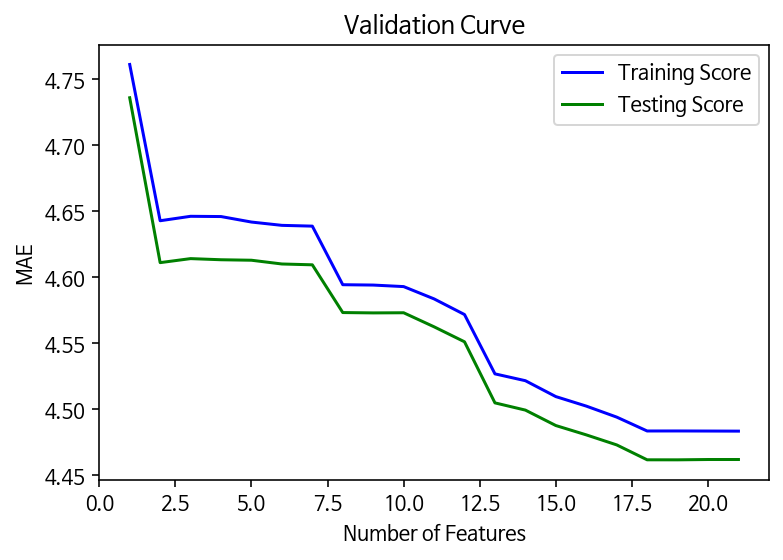

In [ ]:
# features 최적 개수 찾기

training = []
testing = []
ks = range(1, len(X_train.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_val_selected = selector.transform(X_val)
    
    all_names = X_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)

    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_val_selected)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    testing.append(mae)
    print(f'Test MAE: {mae:.2f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()


## c) Train Model(재진행)

### Linear Regression(단순선형회귀모델)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer  # 결측치 채워넣기(평균)
from sklearn.compose import TransformedTargetRegressor

# 타겟 변환 전
pipe = make_pipeline(
    SimpleImputer(),
    LinearRegression()  
)
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)  # r2_score와 동일한 값

0.19429860866202742

In [ ]:
# 타겟 변환 후
pipe = make_pipeline(
    SimpleImputer(),
    LinearRegression() 
)

tt = TransformedTargetRegressor(regressor=pipe, func=np.log1p, inverse_func=np.expm1)

tt.fit(X_train, y_train)
tt.score(X_val, y_val)  # r2 < 0 : 모두 일괄 평균으로 예측하는 것보다 모델의 성능이 떨어진다는 의미

-705970237.0199428

In [ ]:
from sklearn.preprocessing import StandardScaler  # 특성들의 척도를 맞추기 위해 표준정규분포로 표준화(평균=0, 표준편차=1)

pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(),  
    LinearRegression() 
)

pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)  # 큰 차이 없음

0.19429893633382334

### Ridge Regression

In [ ]:
# RidgeCV : 최적의 람다 값 찾기
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV  # ridge 회귀 모델의 람다 값을 결정할 때 사용하는 방법 -> 최적의 패널티 값을 찾기

alphas = [0.01, 0.05, 0.1, 0.2, 1.0, 10.0, 100.0]

ridge = RidgeCV(alphas=alphas, normalize=True, cv=3)
ridge.fit(X_train, y_train)
print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  0.01
best score:  0.16849898665680096


In [ ]:
# Ridge Regression
pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(),  
    Ridge(alpha=0.01, normalize=True)
)

pipe.fit(X_train, y_train)
print("R2 : ", pipe.score(X_val, y_val).round(2))

y_pred = pipe.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'validation error(MAE) : {mae:.2f}')

0.19
validation error(MAE) : 4.49


In [ ]:
# SelectKBest
pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(),  
    SelectKBest(f_regression, k=18),
    Ridge(alpha=0.01, normalize=True)
)

pipe.fit(X_train, y_train)
print("R2 : ", pipe.score(X_val, y_val).round(2))

y_pred = pipe.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'validation error(MAE) : {mae:.2f}')

0.19
validation error(MAE) : 4.49


### Polynomial Regression

In [ ]:
# PolynomialFeatures_Ridge : 다항회귀 - 데이터들간의 형태가 비선형 일때 유용
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(), 
    PolynomialFeatures(2, include_bias=False), 
    Ridge(alpha=0.01, normalize=True)
)

pipe.fit(X_train, y_train)
print("R2 : ", pipe.score(X_val, y_val).round(2))

y_pred = pipe.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'validation error(MAE) : {mae:.2f}')

0.33
validation error(MAE) : 3.63


In [ ]:
# PolynomialFeatures_LinearRegression
pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(), 
    PolynomialFeatures(2, include_bias=False), 
    LinearRegression()
)

pipe.fit(X_train, y_train)
print("R2 : ", pipe.score(X_val, y_val).round(2))

y_pred = pipe.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'validation error(MAE) : {mae:.2f}')

0.38
validation error(MAE) : 3.52


### RandomForest Regression

In [47]:
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(), 
    RandomForestRegressor()
)

pipe.fit(X_train, y_train)
print("R2 : ", pipe.score(X_val, y_val).round(2))

y_pred = pipe.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'validation error(MAE) : {mae:.2f}')

R2 :  0.75
validation error(MAE) : 2.14


In [41]:
# RandomizedSearchCV : 최적의 하이퍼파라미터 조합 찾기
from sklearn.model_selection import RandomizedSearchCV

pipe_rf_search = make_pipeline(
    SimpleImputer(),
    StandardScaler(), 
    RandomForestRegressor(random_state=2, oob_score=True)
)

# hyperparameter tuning
dists = {                       
    "randomforestregressor__n_estimators": [100, 150, 200],
    "randomforestregressor__max_depth": [3, 5, 7, None],
    "randomforestregressor__min_samples_leaf": [3, 5, 7, None],
    "randomforestregressor__max_features": ["sqrt", "log2", None]
}

clf = RandomizedSearchCV(
    pipe_rf_search, 
    param_distributions=dists, 
    n_iter=20, # iteration이 검증 시간을 좌우하므로 작게 시작해서 필요한만큼 늘려가는 것이 효율적
    cv=3, # 교차검증 3회 진행 = 50*3 = 150번 학습 진행
    scoring='r2',
    n_jobs=-1,
)

clf.fit(X_train, y_train);


print('최적 하이퍼파라미터: ', clf.best_params_)  
print('r2 score: ', clf.best_score_)

# 최적의 pipeline으로 수행
pipe_rf_search = clf.best_estimator_  
pipe_rf_search.fit(X_train, y_train)
y_pred = pipe_rf_search.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print("R2 : ", pipe_rf_search.score(X_val, y_val).round(2))
print(f'validation error(MAE) : {mae:.2f}')

최적 하이퍼파라미터:  {'randomforestregressor__n_estimators': 150, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__max_features': None, 'randomforestregressor__max_depth': None}
r2 score:  0.7285732277736909
R2 :  0.75
validation error(MAE) : 2.14


In [42]:
pipe_rf_search.score(X_train, y_train).round(2)

0.92

### XGBoost Regression

In [50]:
from xgboost import XGBRegressor

pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(), 
    XGBRegressor(n_estimators=200 , 
                 random_state=2,
                 n_jobs=-1, 
                 max_depth=7, 
                 learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print("R2 : ", pipe.score(X_val, y_val).round(2))
print(f'validation error(MAE) : {mae:.2f}')

[09:37:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 :  0.75
validation error(MAE) : 2.18


In [ ]:
# overfitting 확인
print("train R2 : ", pipe.score(X_train, y_train).round(2))

train R2 :  0.85


In [ ]:
pipe_xg_serch = make_pipeline(
    SimpleImputer(),
    StandardScaler(), 
    XGBRegressor(n_estimators=500  
                  , random_state=2
                  , n_jobs=-1
                  )
)

# hyperparameter tuning
dists = {                       
    "xgbregressor__max_depth": [3, 5, 7, 10, None],
    "xgbregressor__learning_rate": [0.001, 0.01, 0.1]
}

clf = RandomizedSearchCV(
    pipe_xg_serch, 
    param_distributions=dists, 
    n_iter=20, # iteration이 검증 시간을 좌우하므로 작게 시작해서 필요한만큼 늘려가는 것이 효율적
    cv=3, # 교차검증 3회 진행 = 50*3 = 150번 학습 진행
    scoring='r2',
    n_jobs=-1,
)

clf.fit(X_train, y_train);


print('최적 하이퍼파라미터: ', clf.best_params_)  
print('f1 score: ', clf.best_score_)

# 최적의 pipeline으로 수행
pipe_xg_serch = clf.best_estimator_  
pipe_xg_serch.fit(X_train, y_train, early_stopping_rounds=30);
y_pred = pipe_xg_serch.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print("R2 : ", pipe_xg_serch.score(X_val, y_val).round(2))
print(f'validation error(MAE) : {mae:.2f}')

In [ ]:
# overfitting 확인
print("train R2 : ", pipe_xg_serch.score(X_train, y_train).round(2))

## e) Test Model

In [ ]:
model = pipe  # XGBRegressor
y_pred = model.predict(X_test)  
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))
print("R2 : ", model.score(X_test, y_test).round(2))

,Metric,Score
0,MSE,22.22946
1,MAE,2.16344
2,RMSE,4.71481
3,R2,0.75342


R2 :  0.75


- 모델 성능 평가

  검증 데이터셋과 비슷한 성능이 나타난 것을 확인할 수 있다.

  잔차 오류는 평균 2m 정도 차이가 나며, R2의 성능은 1에 가까울수록 좋은데 0.75의 성능이 나온 것을 확인할 수 있다.

  평균을 이용한 기준모델의 성능이 MAE : 5.37, R2 : 0 이었던 것과 비교하면 모델 학습을 통해 성능이 엄청나게 개선된 것을 확인할 수 있다.

# 4. Interpreting ML Model

## a) Feature Importance

### Feature Importances

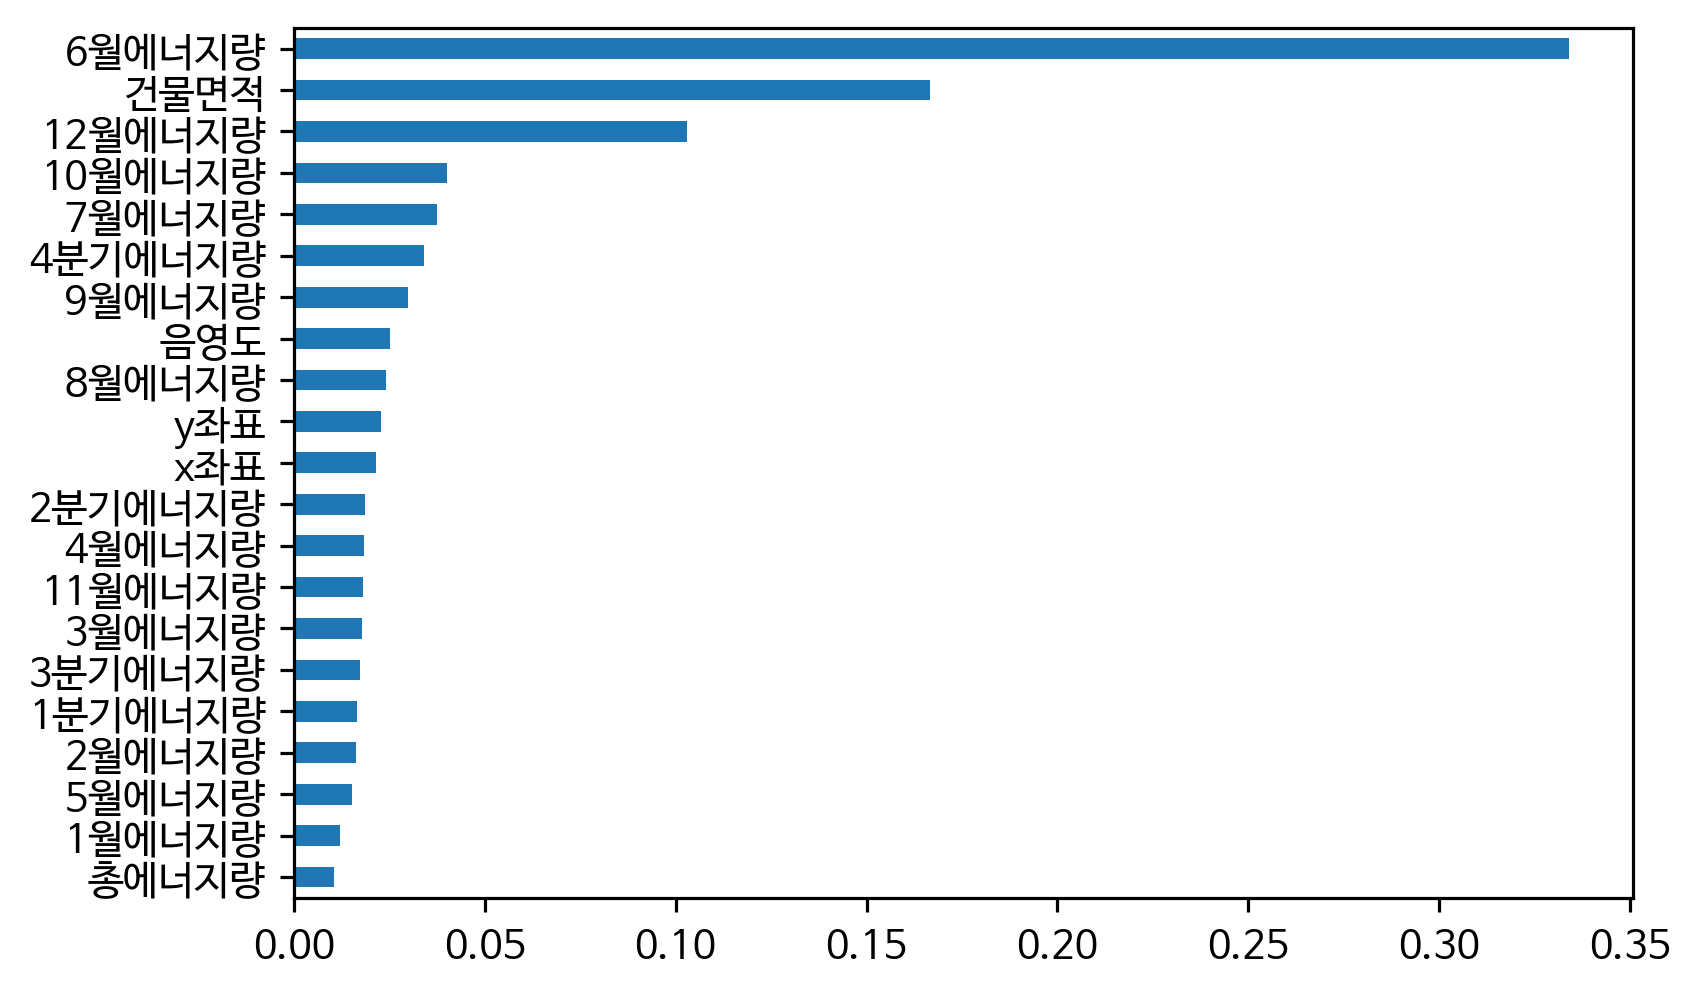

In [ ]:
# 특성 중요도(feature importance) = 불순도 감소(mean decrease impurity)를 나타냄
model_xgb = pipe.named_steps['xgbregressor']
importances = pd.Series(model_xgb.feature_importances_, X_train.columns)
importances.sort_values().plot.barh();

### Permutation Importances(순열중요도, MDA)

(+/-)값은 중요도의 정도를 나타내는 것이지 예측값과의 음/양의 상관관계를 나타내는 것이 아님(+:중요도 높음/ -: 중요도 낮음)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance 

# permuter 정의
permuter = PermutationImportance(
    model, # 변경!!!
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복 계산
    random_state=2
)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_test, y_test);

# eli5
feature_names = X_test.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)  # worst texture

Weight,Feature
0.9525 ± 0.0188,건물면적
0.4469 ± 0.0088,8월에너지량
0.3755 ± 0.0122,6월에너지량
0.2956 ± 0.0106,12월에너지량
0.2385 ± 0.0017,3분기에너지량
0.2306 ± 0.0016,7월에너지량
0.1266 ± 0.0025,2분기에너지량
0.0714 ± 0.0034,11월에너지량
0.0492 ± 0.0011,5월에너지량
0.0491 ± 0.0021,x좌표


모델의 예측값과 음/양의 상관관계를 갖는 특성을 알 순 없으므로 PDP, SHAP 이용

## b) SHAP Values(Shapley values)

Understand individual predictions(개별 예측 이해)

하나의 샘플에 각 특성이 어떤 영향을 미쳤는지

In [ ]:
import shap

explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test.iloc[:100])

# 1) Draw SHAP plots - force_plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:100])

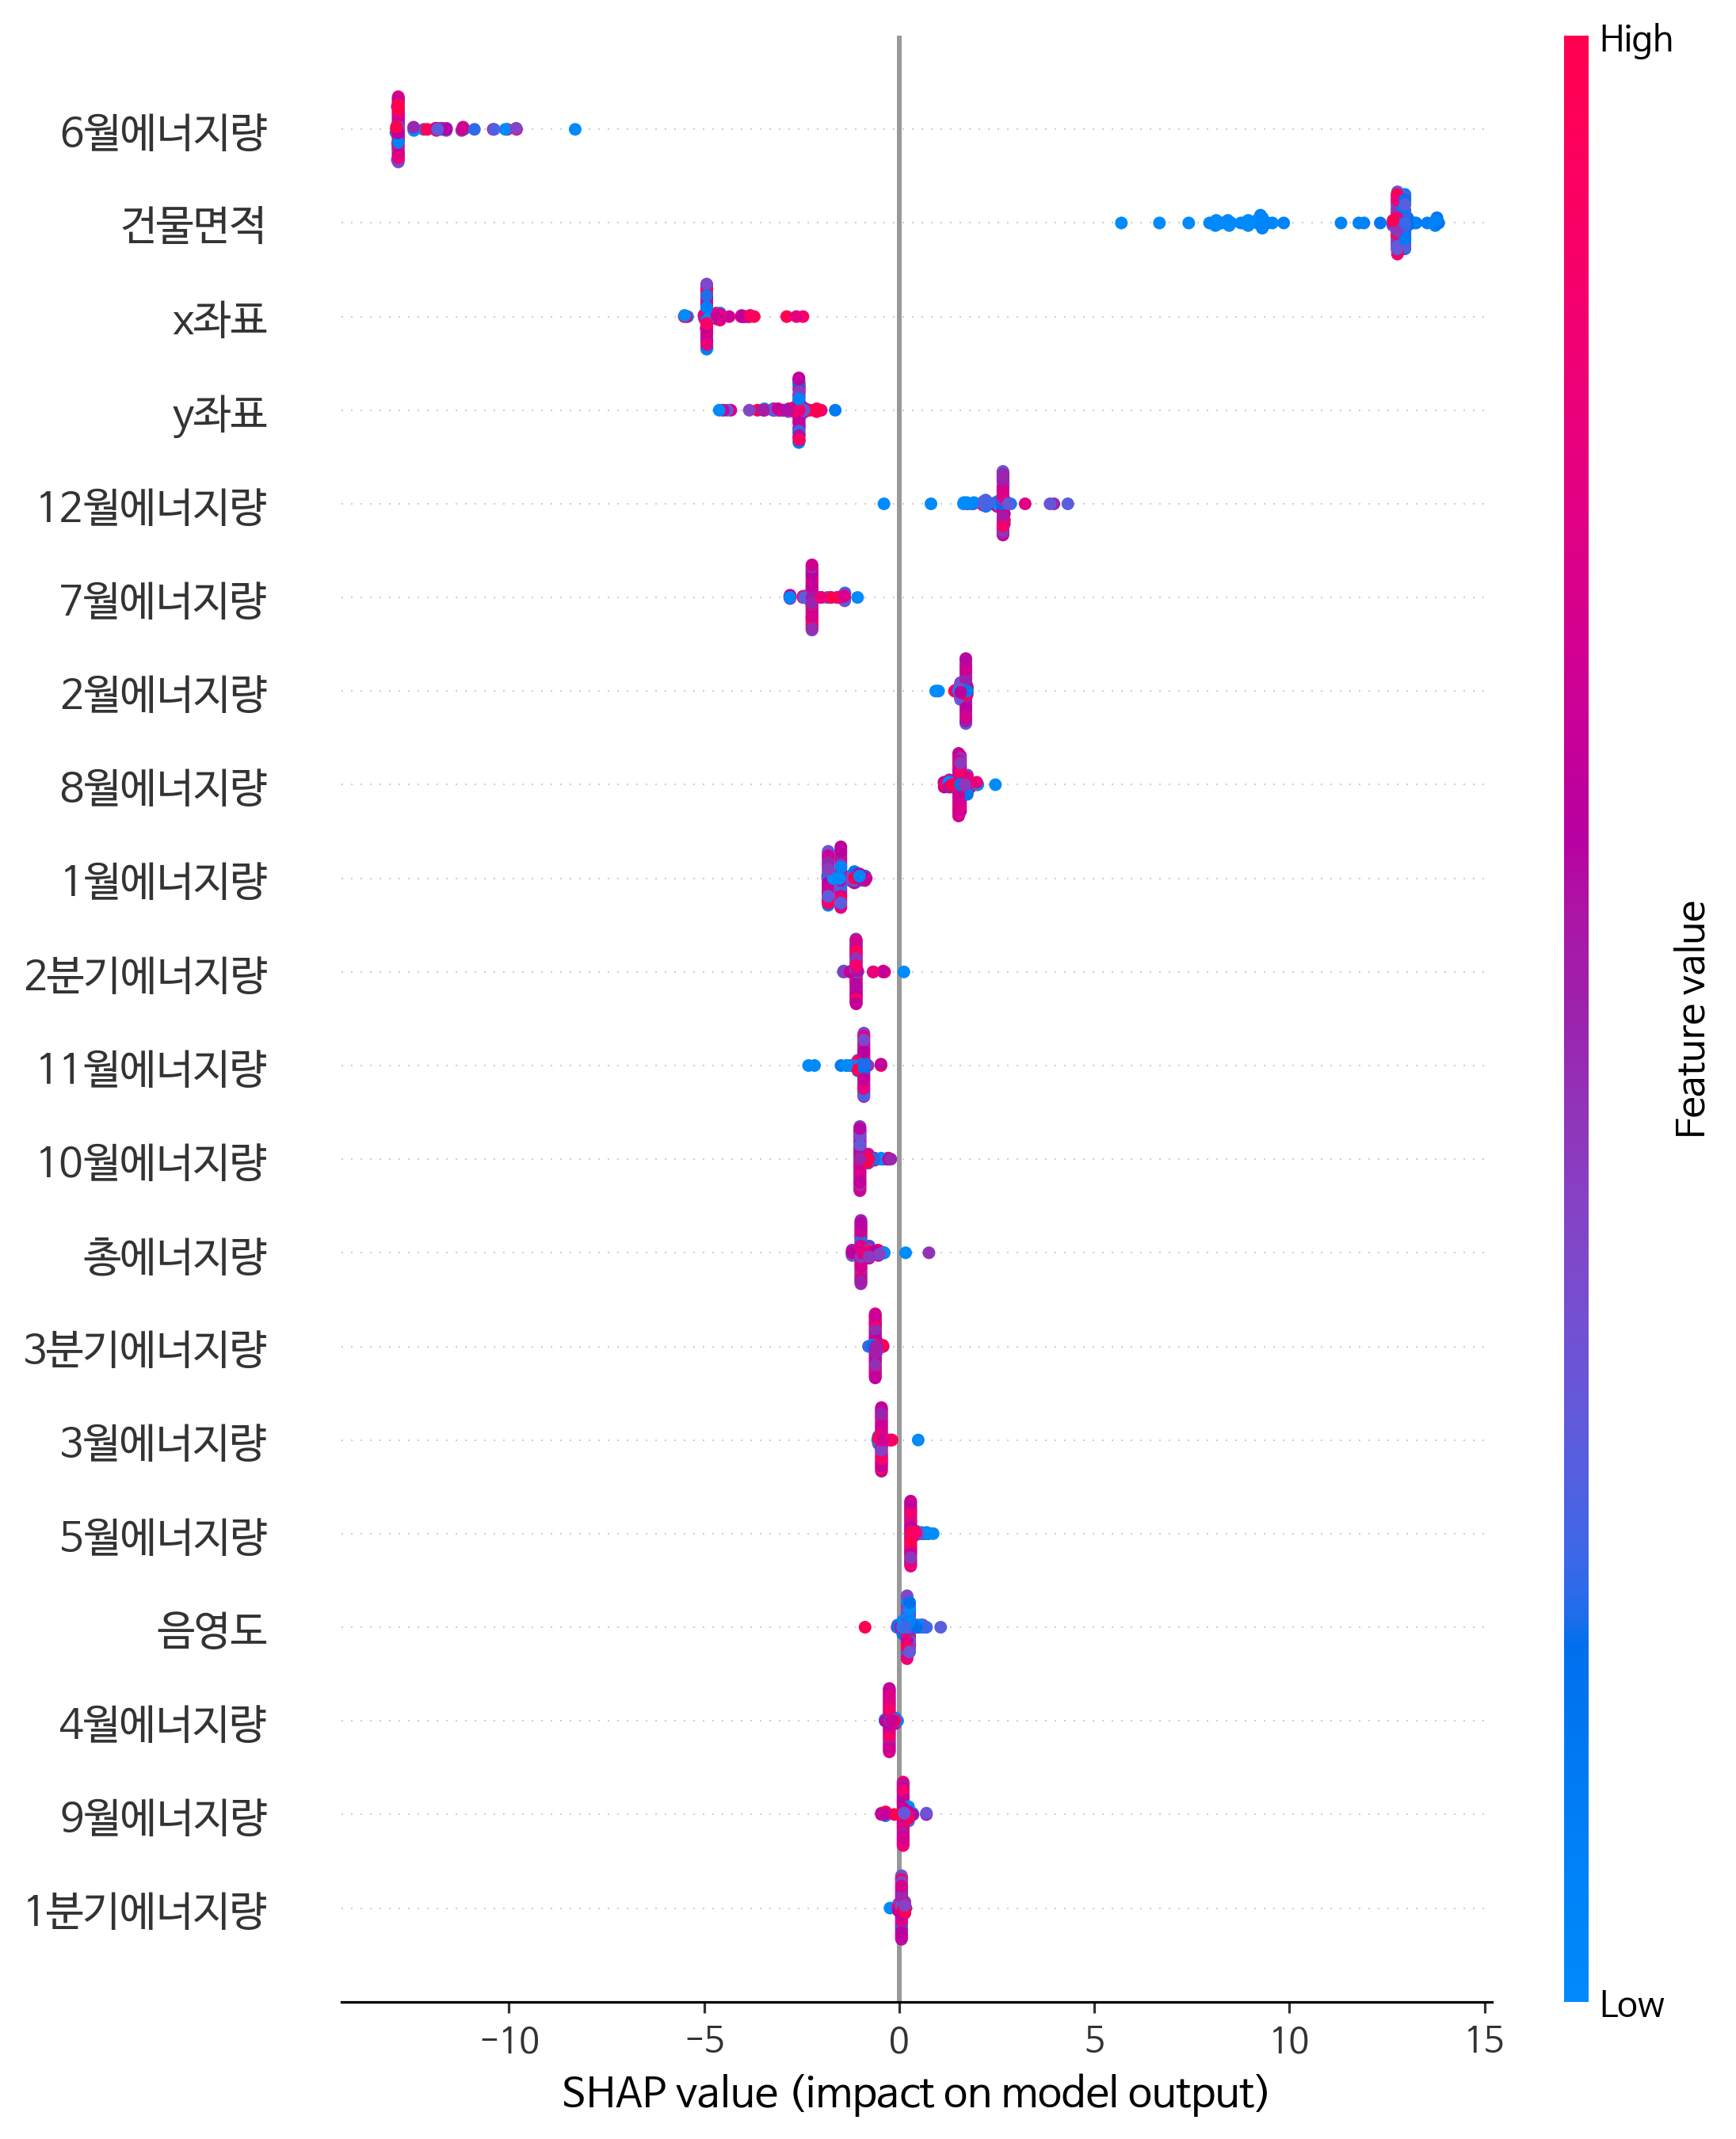

In [ ]:
# 2) SHAP의 summary_plot
shap.summary_plot(shap_values, X_test.iloc[:100])

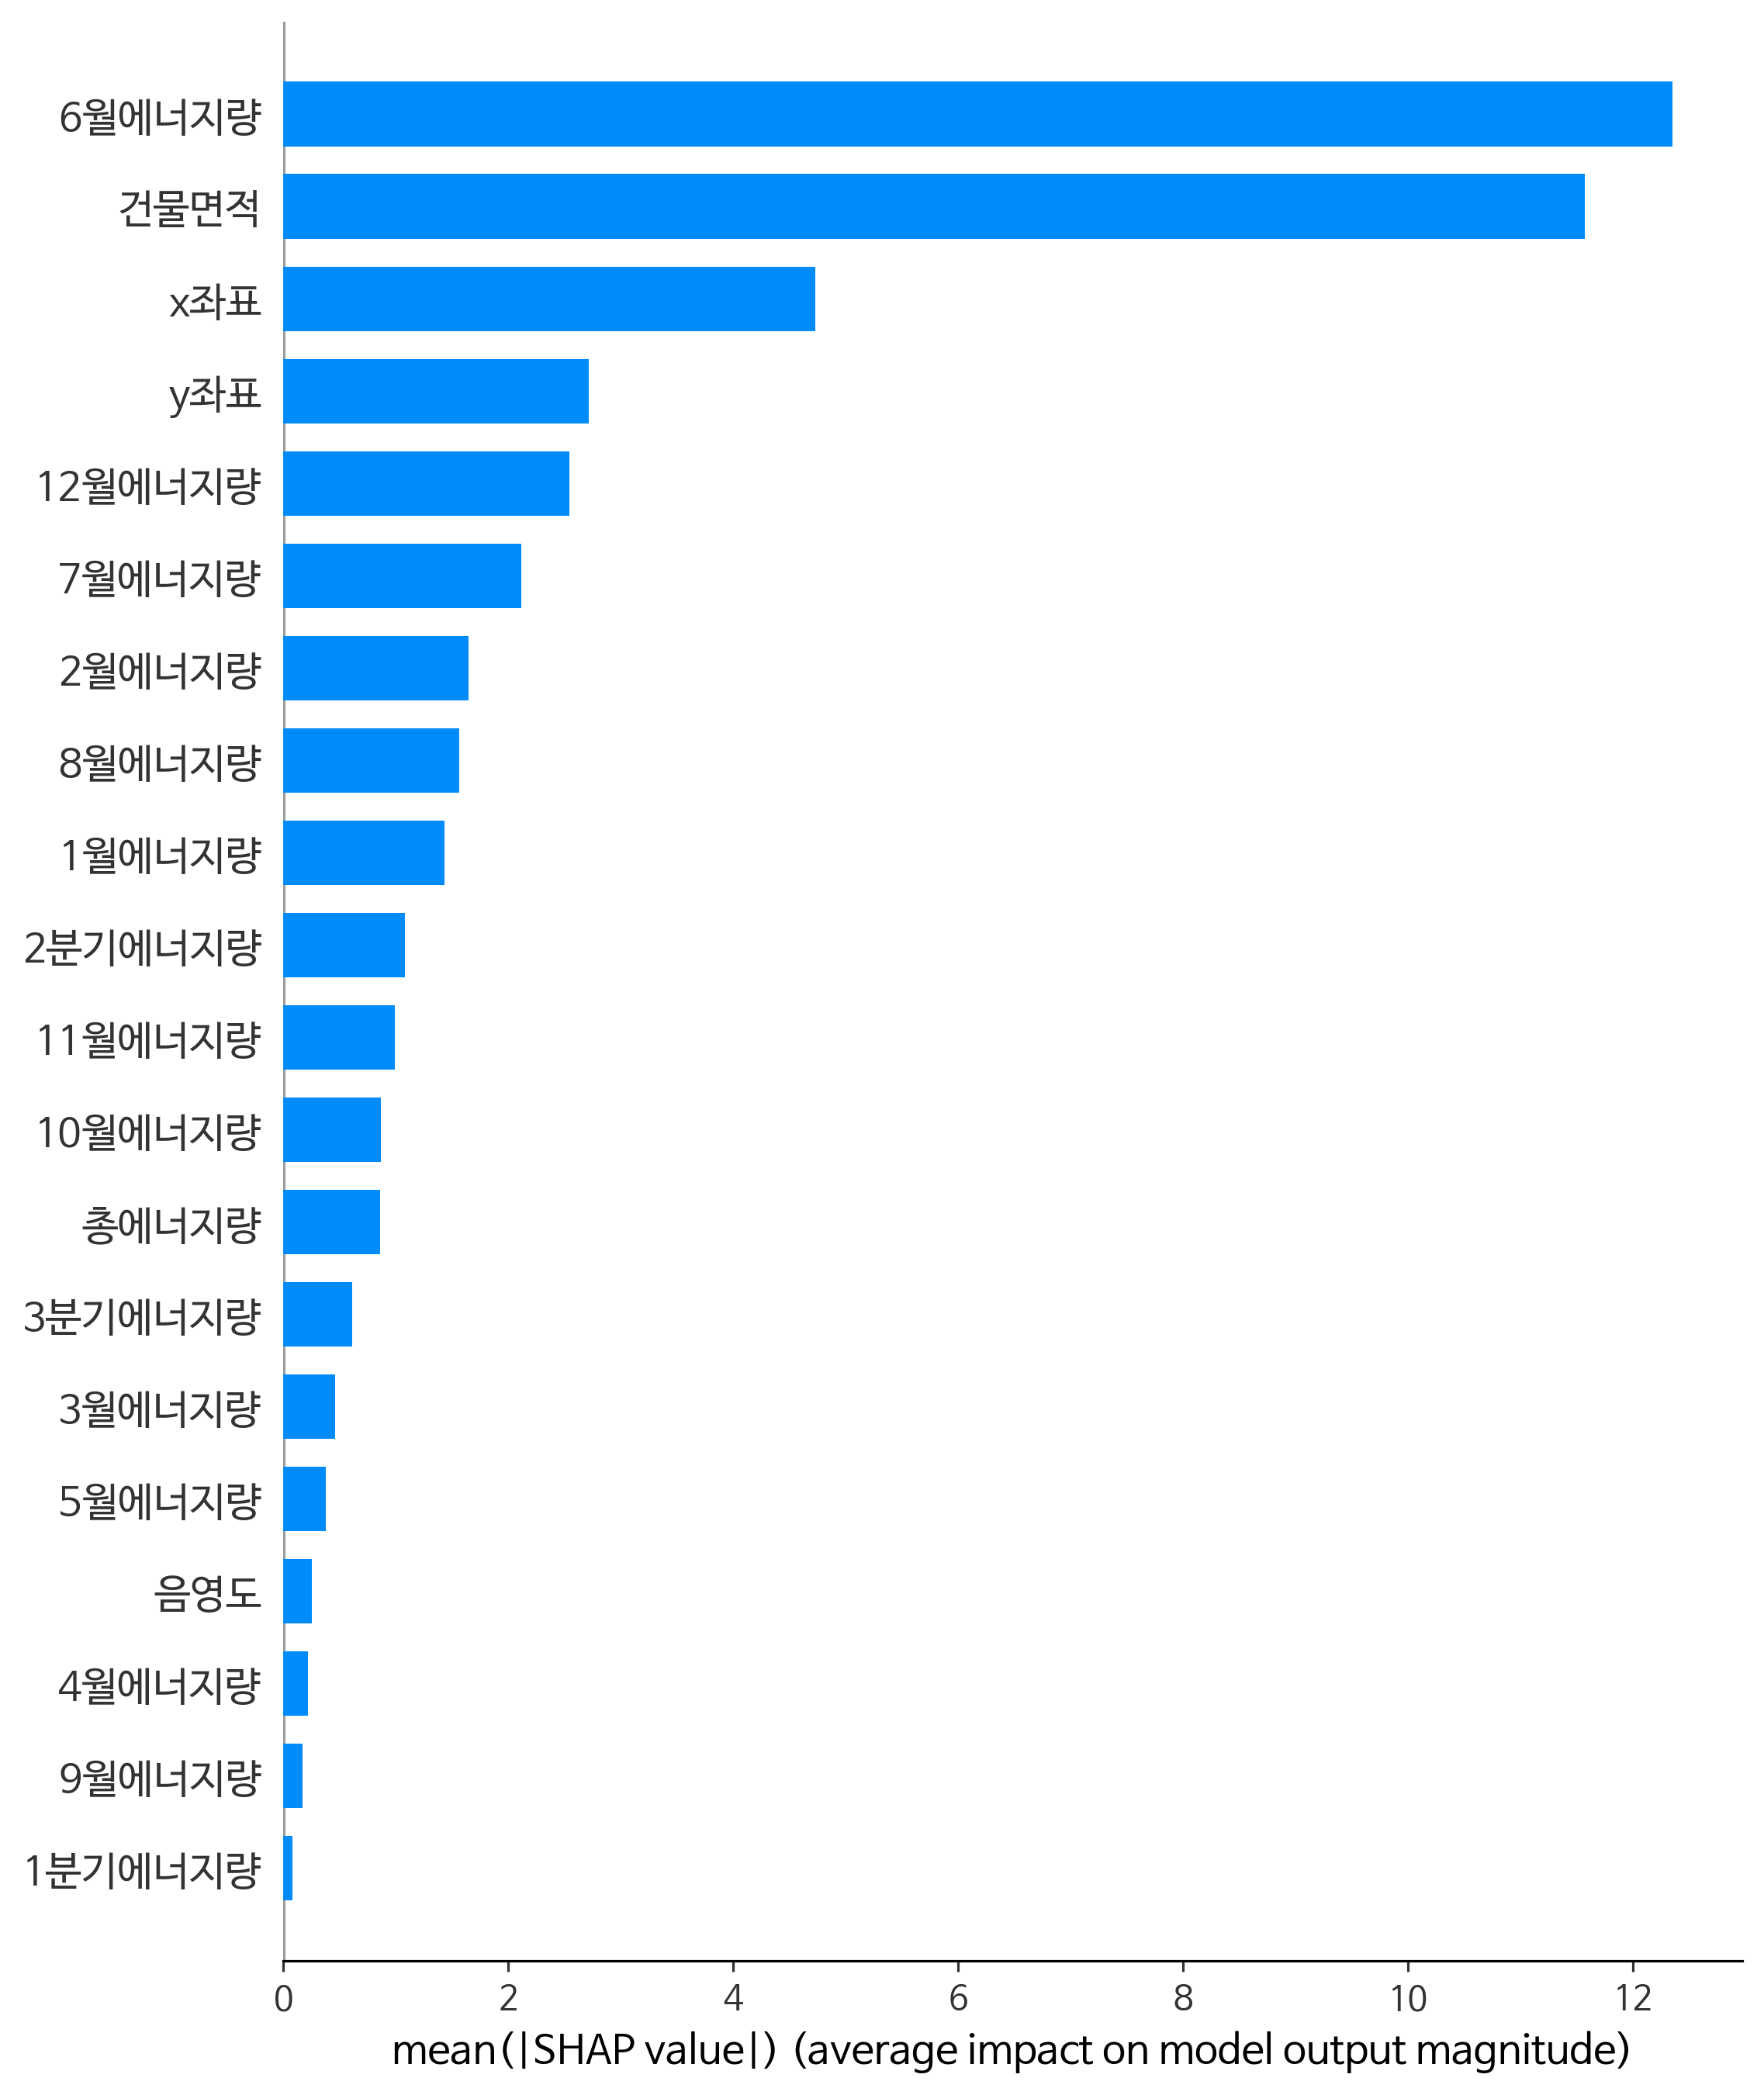

In [ ]:
# 3) SHAP summary_plot(plot_type="bar")을 통해 특성이 미치는 영향을 확인할 수 있다
shap.summary_plot(shap_values, X_train, plot_type="bar") 

6월 에너지량은 음의 영향을 주고, 건물면적은 양의 영향을 주는 것을 알 수 있다. 

# 5. 정리

모델 학습 결과에 대한 논리적 해석이 드러나 있다. (가설 해소 혹은 문제 해결 등)


 - 모델 학습 결과에 대한 한계점

  데이터의 분포가 높은 건물일수록 부족하였는데 scaling을 진행하였으나, 이 부분이 완벽하게 해결되지 못하여 성능이 더 좋아지지 못하였다.

 - 추후 개선사항

  도메인 지식이 부족하여 가설에 대한 증명과 원인 분석이 좀 더 구체적으로 잘 이루어지지 못한 부분이 아쉬워 도메인 지식과 인사이트를 도출하는 스킬을 늘려야겠다.

  회귀에서의 데이터 분포 불균형 문제를 어떤식으로 해결할 수 있을지 더 찾아보고, 성능을 개선할 수 있도록 더 다양한 하이퍼파라미터들을 적용해보거나 영향을 많이 미치지 않는 feature들을 제거하여 학습시켜보고, 다양한 다른 회귀 모델을 적용해 봐야 한다.
